# Project 2: Ames Housing Data Analysis and Modelling

## Problem Statement

Using the information in the Ames Housing Dataset, is it possible to **predict the housing sale prices for houses in Ames, IA, USA (by employing different Machine Learning techniques)**? If yes, **how accurately can these housing sale prices be predicted?**

## Executive Summary

According to this [page](https://nycdatascience.com/blog/student-works/machine-learning/machine-learning-project-ames-housing-dataset/), the Ames Housing Dataset contains observations of housing sales in Ames, Iowa, USA between 2006 and 2010. There are 23 nominal, 23 ordinal, 14 discrete, and 20 continuous features describing each house's size, quality, area, age, and other miscellaneous attributes. In this project, **I seek to apply different machine learning techniques to predict the sale price of houses based on their features**.

For ease of organization and understanding, the project has been **divided into 3 separate Jupyter notebooks**. The first 2 notebooks each focus on getting the datasets ready for application of machine learning techniques later on. This involves data cleaning, converting ordinal variables to numerical scales & one-hot encoding the nominal variables. The third notebook then focuses on EDA, different methods of feature selection, modelling and evaluation.

In order to predict the housing sale prices, I employ different methods of feature selection and machine learning techniques. Some of the techniques/models employed in this project are **Linear Regression, Regularization (Lasso, Ridge & ElasticNet), Recursive Feature Elimination with Cross-Validation (RFECV), GridSearchCV and Sequential Feature Selector**. Each of the models built are evaluated using metrics such as **R^2 score, Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)** to explain how well the models may generalize to new data.

The predictions of housing sale prices from these models may be very relevant in the real world. For instance, these predictions may be used by home owners, buyers, sellers and realtors to gauge how much a house may be worth given it's characteristics (features). The predictions may also be used by the local government for tax assessment purposes or by financial institutions to determine the loan and mortgage rates. Although the predictions modelled in this project may be localized to the city of Ames, they may be applied to other cities (with caution) to understand the differences, before refining the models for such cities.

### Contents:
- Jupyter Notebook 1 - ***1_data_cleaning_train_csv.ipynb***
    - Preparation of train.csv
        - Data Import & Cleaning
        - Data Dictionary
        - One-hot Encoding of Nominal Variables
- Jupyter Notebook 2 - ***2_data_cleaning_test_csv.ipynb***
    - Preparation of test.csv
        - Data Import & Cleaning
        - Data Dictionary
        - One-hot Encoding of Nominal Variables
        - Matching columns between train & test datasets
- Jupyter Notebook 3 - ***3_EDA_feature_selection_model_evaluation.ipynb***
    - [Data Dictionary & Data Importing](#Data-Dictionary-&-Data-Importing)
    - [Exploratory Data Analysis](#Exploratory-Data-Analysis)
        - [EDA of Continuous Variables](#EDA-of-Continuous-Variables)
        - [EDA of Discrete Variables](#EDA-of-Discrete-Variables)
        - [EDA of Ordinal Variables](#EDA-of-Ordinal-Variables)
        - [EDA of Nominal Variables](#EDA-of-Nominal-Variables)
        - [Correlations between Selected Variables](#Correlations-between-Selected-Variables)
        - [Imputation of  Missing Data](#Imputation-of-Missing-Data)
    - [Feature Selection, Model Building & Evaluation](#Feature-Selection,-Model-Building-&-Evaluation)
        - [Model Preparation](#Model-Preparation)
        - [RFECV with LinearRegression](#RFECV-with-LinearRegression)
        - [RidgeCV followed by Ridge](#RidgeCV-followed-by-Ridge)
        - [LassoCV followed by Lasso](#LassoCV-followed-by-Lasso)
        - [GridSearchCV with ElasticNet](#GridSearchCV-with-ElasticNet)
        - [Sequential Forward Selection with Linear Regression](#Sequential-Forward-Selection-with-Linear-Regression)
    - [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Install mlxtend package before running this through 'pip install mlxtend' in command prompt.
from mlxtend.feature_selection import SequentialFeatureSelector

sns.set_style('whitegrid')

## Data Dictionary & Data Importing

In [2]:
# The data dictionary (compiled in MS Excel while going through the data cleaning process) will be imported below so as to ease the process of filtering columns for EDA.

data_dict = pd.read_csv("../datasets/data_dictionary.csv")
data_dict.head(10)

Column name Variable type Col dtype (initial) Col dtype (converted to)  \
0            Id      discrete               float                      NaN   
1           PID       nominal               float                      NaN   
2   MS SubClass       nominal               float                      NaN   
3     MS Zoning       nominal              object                      NaN   
4  Lot Frontage    continuous               float                      NaN   
5      Lot Area    continuous               float                      NaN   
6        Street       nominal              object                      NaN   
7         Alley       nominal              object                      NaN   
8     Lot Shape       ordinal              object                    float   
9  Land Contour       nominal              object                      NaN   

  Col dtype (final) Needs one-hot encoding  Possible unique values  \
0             float                     no                     NaN   
1             float                     no                     NaN   
2             float                    yes                    16.0   
3            object                    yes                     8.0   
4             float                     no                     NaN   
5             float                     no                     NaN   
6            object                    yes                     2.0   
7            object                    yes                     3.0   
8             float                     no                     4.0   
9            object                    yes                     4.0   

   Unique values in train  Rows of missing data  \
0                     NaN                     0   
1                     NaN                     0   
2                    16.0                     0   
3                     7.0                     0   
4                     NaN                   330   
5                     NaN                     0   
6                     2.0                     0   
7                     3.0                     0   
8                     4.0                     0   
9                     4.0                     0   

                                         Description  
0                                Observation number.  
1                      Parcel identification number.  
2  Identifies the type of dwelling involved in th...  
3  Identifies the general zoning classification o...  
4       Linear feet of street connected to property.  
5                           Lot size in square feet.  
6                   Type of road access to property.  
7                  Type of alley access to property.  
8  General shape of property. 'Reg' = 4, 'IR1' = ...  
9                          Flatness of the property.

In [3]:
# Read train_cleaned.csv and assign it to a dataframe 'c_train'.
# keep_default_na=False because train_claned.csv has a few object columns which have 'NA' values which have meanings.
# We need to avoid these 'NA' values from being wrongly read as empty NaN values by default.
# Only missing values (blank in the CSV file) should be identified as NaN values.

c_train = pd.read_csv('../datasets/train_cleaned.csv', keep_default_na=False)

In [4]:
c_train.shape

(2044, 81)

In [5]:
# Similar to what was done during the data cleaning process, notice that some columns have wrong data type object, instead of int/float.
# Also, reading the CSV file with keep_default_na=False doesn't give us ANY NaN (null/missing) values in the entire dataframe.

# This is because it reads the missing values in the CSV as '' (empty string) instead.
# This means that some columns with int/float types get converted to object type if they have any missing values.
# So, we need to replace all '' with np.nan in all the numerical columns, and convert remaining values to type float.
# And we need to replace all '' with np.nan in all non-numerical columns.

c_train.dtypes.value_counts()

float64    58
object     23
dtype: int64

In [6]:
# For example, 'Lot Frontage' column should be of type float, but because of the missing values ( read as empty string ''), it is now of type object.

c_train['Lot Frontage'].dtype

dtype('O')

In [7]:
# Filtering columns from data_dict which do not require one-hot encoding. These columns should be of type float.

len(data_dict[data_dict['Needs one-hot encoding']=='no']['Column name'])

60

In [8]:
# Mapping a lambda function for all above filtered numerical columns to convert all '' (empty string) to NaN and all other values to type float.

for col in data_dict[data_dict['Needs one-hot encoding']=='no']['Column name']:
    c_train[col] = c_train[col].map(lambda x : np.nan if x=='' else float(x))

In [9]:
c_train.dtypes.value_counts()

float64    61
object     20
dtype: int64

In [10]:
# Verifying correct number of columns with type float and object in c_train dataframe.

data_dict['Col dtype (final)'].value_counts()

float     61
object    20
Name: Col dtype (final), dtype: int64

In [11]:
# Re-checking type of 'Lot Frontage' column to ensure it is now of correct type float.

c_train['Lot Frontage'].dtype

dtype('float64')

In [12]:
# Mapping a lambda function for all non-numerical columns to convert all '' (empty string) to NaN.

for col in c_train.columns:
    if col not in data_dict[data_dict['Needs one-hot encoding']=='no']['Column name']:
        c_train[col] = c_train[col].map(lambda x : np.nan if x=='' else x)

In [13]:
# Checking for all np.nan values in all columns and filtering out columns which have one or more rows with np.nan values.
# This is the number of remaining missing values in the dataframe.
# I will consider imputing this missing data if these columns are absolutely required in the regression model.

null_cols_c_train = c_train.isna().sum()[c_train.isna().sum()!=0]
null_cols_c_train

Lot Frontage     330
Mas Vnr Type      22
Mas Vnr Area      22
Garage Yr Blt    113
dtype: int64

In [14]:
# Reading train_cleaned_encoded.csv and assigning it to a new dataframe 'ce_train'.

ce_train = pd.read_csv('../datasets/train_cleaned_encoded.csv')

In [15]:
ce_train.shape

(2044, 213)

In [16]:
ce_train.dtypes.value_counts()

int64      153
float64     60
dtype: int64

In [17]:
# Checking for all np.nan values in all columns and filtering out columns which have one or more rows with np.nan values.
# This is the number of remaining missing values in the dataframe.
# I will consider imputing this missing data if these columns are absolutely required in the regression model.

null_cols_ce_train = ce_train.isna().sum()[ce_train.isna().sum()!=0]
null_cols_ce_train

# The above c_train dataframe has 22 missing values (NaN) in 'Mas Vnr Type' column, but ce_train does not have any missing values in this.
# This is because 'Mas Vnr Type' column was one-hot encoded and the 22 rows with missing values were ignored (dummy_na=False in pd.get_dummies()),
# since the number of rows with missing values (22) is only about 1% of the total number of rows.

Lot Frontage     330
Mas Vnr Area      22
Garage Yr Blt    113
dtype: int64

In [18]:
# Reading test_cleaned_encoded.csv and assigning it to a new dataframe 'ce_test'.

ce_test = pd.read_csv('../datasets/test_cleaned_encoded.csv')

In [19]:
ce_test.shape

(879, 212)

In [20]:
ce_test.dtypes.value_counts()

int64      153
float64     59
dtype: int64

In [21]:
# Checking for all np.nan values in all columns and filtering out columns which have one or more rows with np.nan values.
# This is the number of remaining missing values in the dataframe.
# I will consider imputing this missing data if these columns are absolutely required in the regression model.

null_cols_ce_test = ce_test.isna().sum()[ce_test.isna().sum()!=0]
null_cols_ce_test

Lot Frontage     160
Mas Vnr Area       1
Electrical         1
Garage Yr Blt     45
Garage Finish      1
dtype: int64

## Exploratory Data Analysis

Now that I have *train.csv* cleaned (*train_cleaned.csv* imported as *'c_train'*) and one-hot encoded (*train_cleaned_encoded.csv* imported as *'ce_train'*), I can proceed with the EDA process.

The following 2 columns will be disregarded from this point on because of the reasons explained below:

- **Id**: Type *int*, discrete. Shows observation number. Wouldn't make logical sense to include it in the regression model.
- **PID**: Type *int*, nominal. Shows parcel identification number. Wouldn't make logical sense to include it in the regression model.

Throughout this section, I will perform EDA on the different types of variables (continuous, discrete, ordinal & nominal), one at a time. For each type of variables, I will examine the variables and their relationships with the target variable *SalePrice*, and then determine which of these should be included in the next stage of feature selection for regression modelling. This process is crucial as there are currently >200 columns of variables, and the dataset needs to be converted into a more manageable size in terms of available variables. During this process, I will also determine the presence of any outliers among the variable values. Once I obtain a more manageable number of features from the EDA process, I will then employ different techniques of feature selection and machine learning models, and evaluate them based on the metrics chosen.

#### Multiple Linear Regression (MLR) - Assumption 1

One of the assumptions for MLR is that of **linearity** - *target variable Y must have an approximately linear relationship with each independent predictor X*. To determine this relationship, I will utilize the Pearson/Spearman/Kendall correlation coefficients. **The choice between Pearson, Spearman and Kendall correlations depends on the distribution of the variable (normal vs. not normal) and the type of variable (continuous vs. discrete/ordinal)**.

### EDA of Continuous Variables

In [22]:
# Filtering all columns of continuous variables.
# These columns will be used to calculate the correlation coefficient against 'SalePrice' column.

continuous_corr_df = pd.DataFrame(data_dict.loc[data_dict['Variable type']=='continuous', 'Column name'])

#Creating an extra column 'SalePrice' of 0 values. These values will be replaced with the correlation coefficient.
continuous_corr_df['SalePrice'] = 0

# Setting 'Column name' column as index.
continuous_corr_df.set_index('Column name', inplace=True)

# Transposing the dataframe to make indices into columns.
continuous_corr_df = continuous_corr_df.T

# Dropping the 'SalePrice' column (because we don't need to see the correlation between 'SalePrice' and 'SalePrice')
continuous_corr_df.drop(columns=['SalePrice'], inplace=True)

continuous_corr_df

Column name  Lot Frontage  Lot Area  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
SalePrice               0         0             0             0             0   

Column name  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
SalePrice              0              0           0           0   

Column name  Low Qual Fin SF  Gr Liv Area  Garage Area  Wood Deck SF  \
SalePrice                  0            0            0             0   

Column name  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  \
SalePrice                0               0           0             0   

Column name  Pool Area  Misc Val  
SalePrice            0         0

To determine which correlation method should be used for continuous variables, I will have to first determine the distribution of each variable itself. According to this [page](https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/), **one of the assumptions for Pearson correlation is that the variables should be normally distributed**. So, if the continuous variable is normally distributed, Pearson correlation will be used. If it is not normally distributed, Kendall correlation will be utilized.

This is a justified approach, because according to this [page](https://towardsdatascience.com/kendall-rank-correlation-explained-dee01d99c535), "*Kendall rank correlation (non-parametric) is an alternative to Pearson’s correlation (parametric) when the data you’re working with has failed one or more assumptions of the test*."

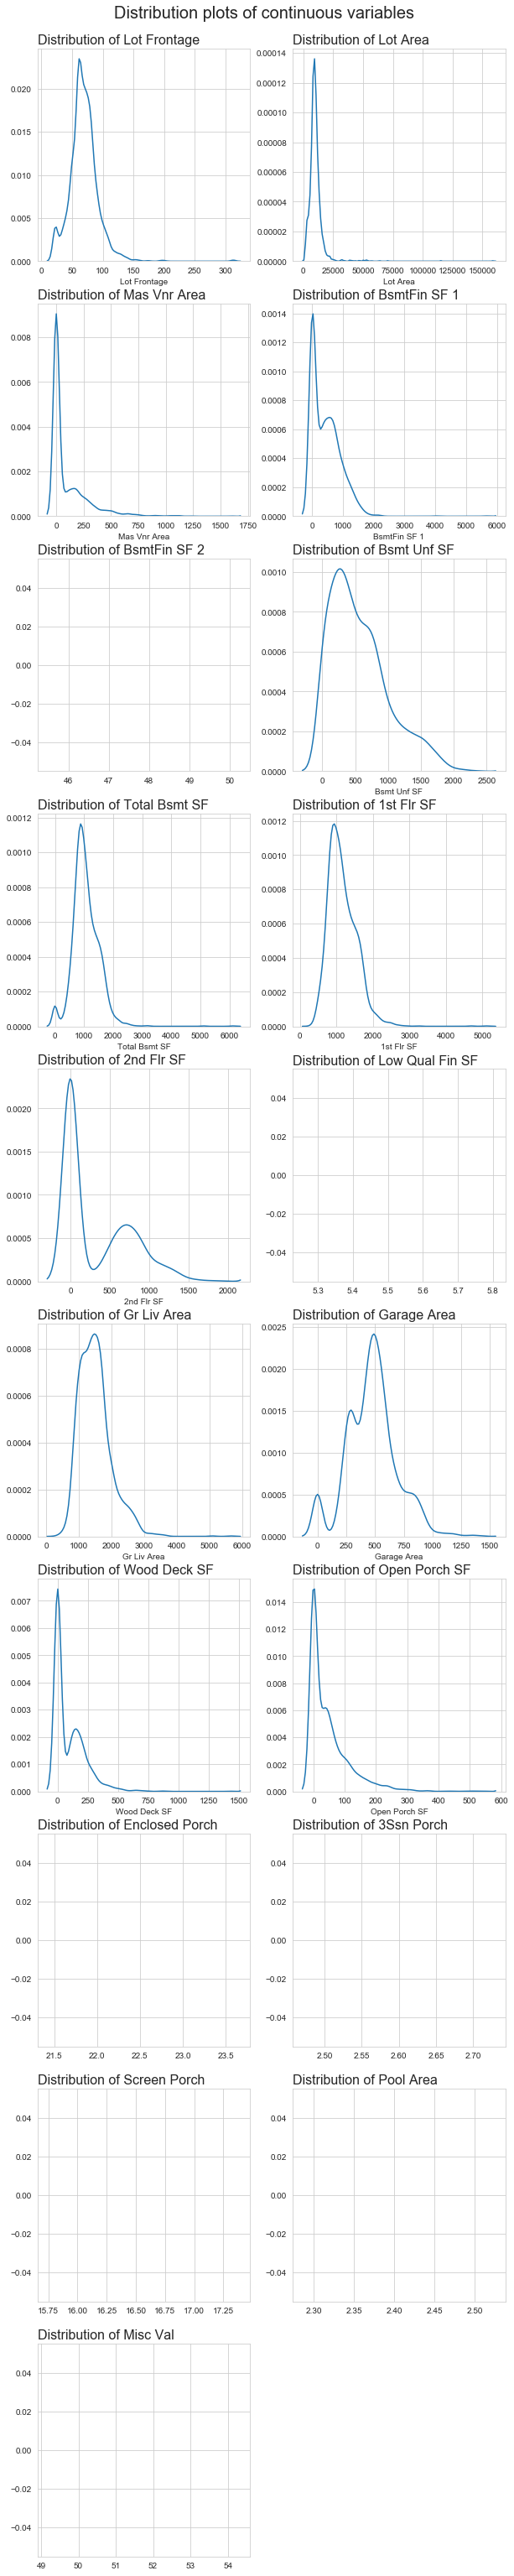

In [23]:
# Plotting distribution plots of all continuous variables.

fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(10,55))

ax = ax.ravel()

for i, col in enumerate(list(continuous_corr_df.columns)):
    
    ax[i].set_title(f"Distribution of {col}", fontsize=16, loc='left')
    
    # We use try & except because some variables are not normally distributed and throw this error during kde calculation:
    # "RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density." 
    try:
        sns.distplot(ce_train[col], ax=ax[i], hist=False, kde=True)
    except:
        pass
    
ax[19].remove()

fig.suptitle(x=0.5, y=0.893, t="Distribution plots of continuous variables", fontsize=20)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/continuous_vars_distplots.png', bbox_inches='tight')

From the above distribution plots, we see that **none of the continuous variables are normally distributed**. Hence, I will **use the Kendall correlation method** to determine the correlation between *SalePrice* and continuous variables (instead of the Pearson correlation method).

In [24]:
# Finding the Kendall correlation coefficient for all continuous variable columns.

for col in continuous_corr_df.columns:
    kendall_coef = ce_train[['SalePrice', col]].corr(method='kendall').iloc[0,1]
    continuous_corr_df.loc['SalePrice', col] = kendall_coef

continuous_corr_df

Column name  Lot Frontage  Lot Area  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
SalePrice        0.281687  0.296508      0.349073      0.255441     -0.030541   

Column name  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
SalePrice       0.109745       0.448052    0.424598    0.185217   

Column name  Low Qual Fin SF  Gr Liv Area  Garage Area  Wood Deck SF  \
SalePrice          -0.069536     0.539097     0.488316      0.269858   

Column name  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  \
SalePrice         0.357655       -0.177954    0.047482      0.085878   

Column name  Pool Area  Misc Val  
SalePrice     0.028669 -0.025752

In [25]:
# Sorting values of correlation coefficients

continuous_corr_df.sort_values(by='SalePrice', axis=1, inplace=True)
continuous_corr_df

Column name  Enclosed Porch  Low Qual Fin SF  BsmtFin SF 2  Misc Val  \
SalePrice         -0.177954        -0.069536     -0.030541 -0.025752   

Column name  Pool Area  3Ssn Porch  Screen Porch  Bsmt Unf SF  2nd Flr SF  \
SalePrice     0.028669    0.047482      0.085878     0.109745    0.185217   

Column name  BsmtFin SF 1  Wood Deck SF  Lot Frontage  Lot Area  Mas Vnr Area  \
SalePrice        0.255441      0.269858      0.281687  0.296508      0.349073   

Column name  Open Porch SF  1st Flr SF  Total Bsmt SF  Garage Area  \
SalePrice         0.357655    0.424598       0.448052     0.488316   

Column name  Gr Liv Area  
SalePrice       0.539097

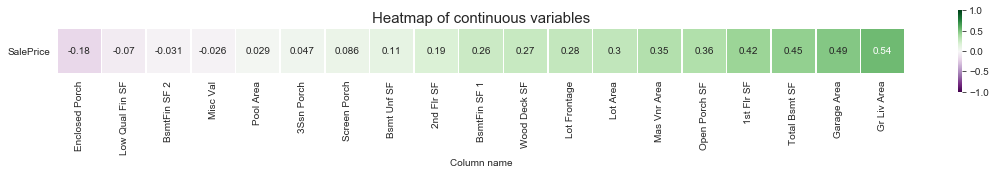

In [26]:
# Plotting the above in a heatmap to visualize the relationship.

plt.figure(figsize=(19,1.5))

sns.heatmap(continuous_corr_df, vmin=-1, vmax=1, annot=True, square=True, linewidths=0.5, cmap='PRGn')

plt.tick_params(axis='y', labelrotation=0)

plt.title("Heatmap of continuous variables", loc='center', fontsize=15)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/continuous_vars_heatmap.png', bbox_inches='tight')

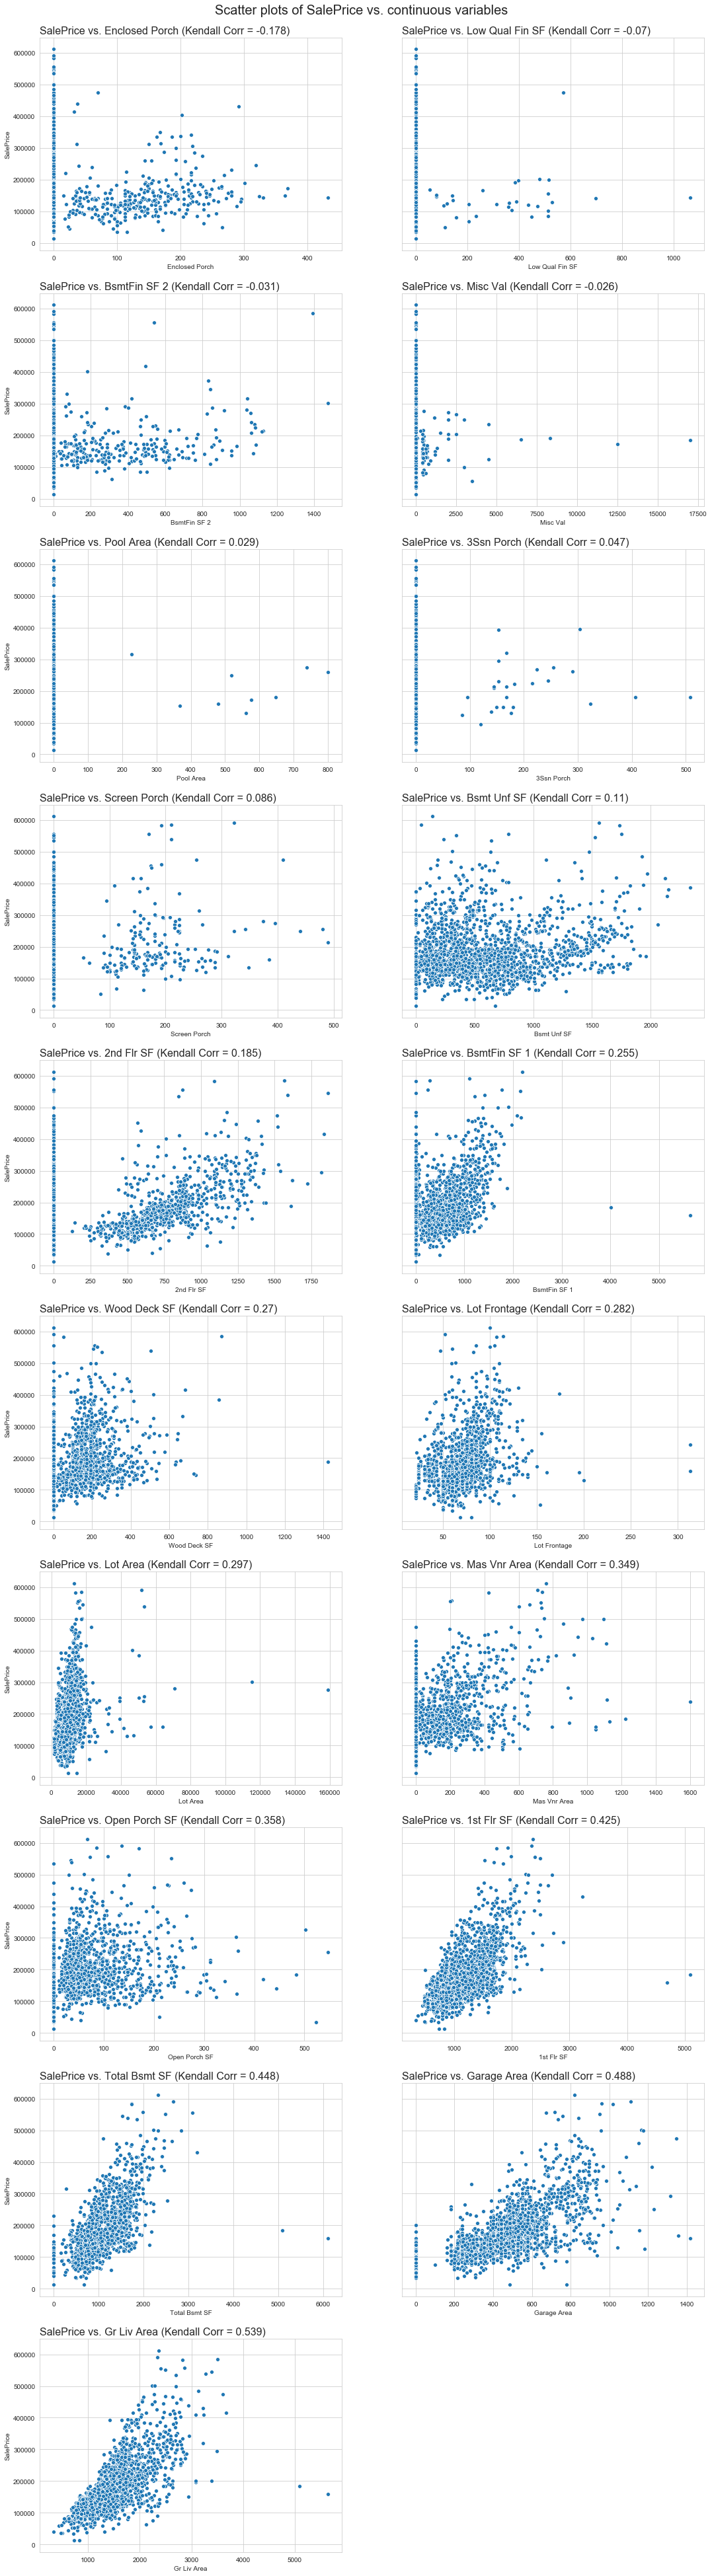

In [27]:
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(18,70), sharey=True)

ax = ax.ravel()

for i, col in enumerate(list(continuous_corr_df.columns)):
    
    sns.scatterplot(data=ce_train, x=col, y='SalePrice', ax=ax[i])
    
    kendall_coef = str(round(ce_train[['SalePrice', col]].corr(method='kendall').iloc[0,1], 3))
    
    ax[i].set_title(f"SalePrice vs. {col} (Kendall Corr = {kendall_coef})", fontsize=16, loc='left')

ax[19].remove()
fig.suptitle(x=0.5, y=0.89, t="Scatter plots of SalePrice vs. continuous variables", fontsize=20)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/continuous_vars_scatterplots.png', bbox_inches='tight')

From the above heatmap and scatter plots, I deduce the following about continuous variables:

- **Presence of outliers**: Some columns, such as *'BsmtFin SF 1', 'Wood Deck SF', 'Lot Frontage', 'Lot Area', '1st Flr SF', 'Total Bsmt SF' & 'Gr Liv Area'*, have 1-2 outliers. These should be removed before proceeding, so as to ensure they have a better linear relationship with *SalePrice*, and the model built using these variables does not have a high bias.
- **Variables selected for next stage**: From the heatmap, I will select variables which have Kendall correlation coefficient of <= -0.2 & >= 0.2. This threshold is chosen because, while it only represents a small degree of association between the variable and *SalePrice*, it filters out an appropriate number of variables for me to proceed with to the next stage of feature selection and model building and evaluation.

So, the columns selected from this stage are: *'BsmtFin SF 1', 'Wood Deck SF', 'Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'Open Porch SF', '1st Flr SF', 'Total Bsmt SF', 'Garage Area' & 'Gr Liv Area'*.

In [28]:
# Filtering all selected variables for next stage.

continuous_selected_list = list(continuous_corr_df.T[(continuous_corr_df.T['SalePrice'] >= 0.2) | (continuous_corr_df.T['SalePrice'] <= -0.2)].index)
continuous_selected_list

['BsmtFin SF 1',
 'Wood Deck SF',
 'Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'Open Porch SF',
 '1st Flr SF',
 'Total Bsmt SF',
 'Garage Area',
 'Gr Liv Area']

In [29]:
# Filtering rows of outliers

# Creating masks for outliers
outlier_mask1 = ce_train['BsmtFin SF 1']>3000
outlier_mask2 = ce_train['Wood Deck SF']>1200
outlier_mask3 = ce_train['Lot Frontage']>250
outlier_mask4 = ce_train['Lot Area']>100_000
outlier_mask5 = ce_train['1st Flr SF']>4000
outlier_mask6 = ce_train['Total Bsmt SF']>4000
outlier_mask7 = ce_train['Gr Liv Area']>4000

outliers_continuous = ce_train[(outlier_mask1) | (outlier_mask2) | (outlier_mask3) | (outlier_mask4) | (outlier_mask5) | (outlier_mask6) | (outlier_mask7)]
outliers_continuous

Id          PID  Lot Frontage  Lot Area  Lot Shape  Utilities  \
471   2116.0  906426060.0           NaN  159000.0        2.0        4.0   
693   2072.0  905301050.0           NaN  115149.0        2.0        4.0   
959   1499.0  908154235.0         313.0   63887.0        1.0        4.0   
965   2294.0  923229100.0           NaN   15957.0        3.0        4.0   
1332  1266.0  535427070.0         313.0   27650.0        2.0        4.0   
1879  2181.0  908154195.0         128.0   39290.0        3.0        4.0   

      Land Slope  Overall Qual  Overall Cond  Year Built  ...  \
471          1.0           6.0           7.0      1958.0  ...   
693          1.0           7.0           5.0      1971.0  ...   
959          3.0          10.0           5.0      2008.0  ...   
965          2.0           6.0           6.0      1977.0  ...   
1332         2.0           7.0           7.0      1960.0  ...   
1879         3.0          10.0           5.0      2008.0  ...   

      Misc Feature_Shed  Misc Feature_TenC  Sale Type_CWD  Sale Type_Con  \
471                   1                  0              0              0   
693                   0                  0              0              0   
959                   0                  0              0              0   
965                   0                  0              0              0   
1332                  0                  0              0              0   
1879                  0                  0              0              0   

      Sale Type_ConLD  Sale Type_ConLI  Sale Type_ConLw  Sale Type_New  \
471                 0                0                0              0   
693                 0                0                0              0   
959                 0                0                0              1   
965                 0                0                0              0   
1332                0                0                0              0   
1879                0                0                0              1   

      Sale Type_Oth  Sale Type_WD   
471               0              1  
693               0              1  
959               0              0  
965               0              1  
1332              0              1  
1879              0              0  

[6 rows x 213 columns]

In [30]:
# Dropping the above 6 rows of outliers from ce_train dataframe.

ce_train.drop(index=outliers_continuous.index, inplace=True)
ce_train.shape

(2038, 213)

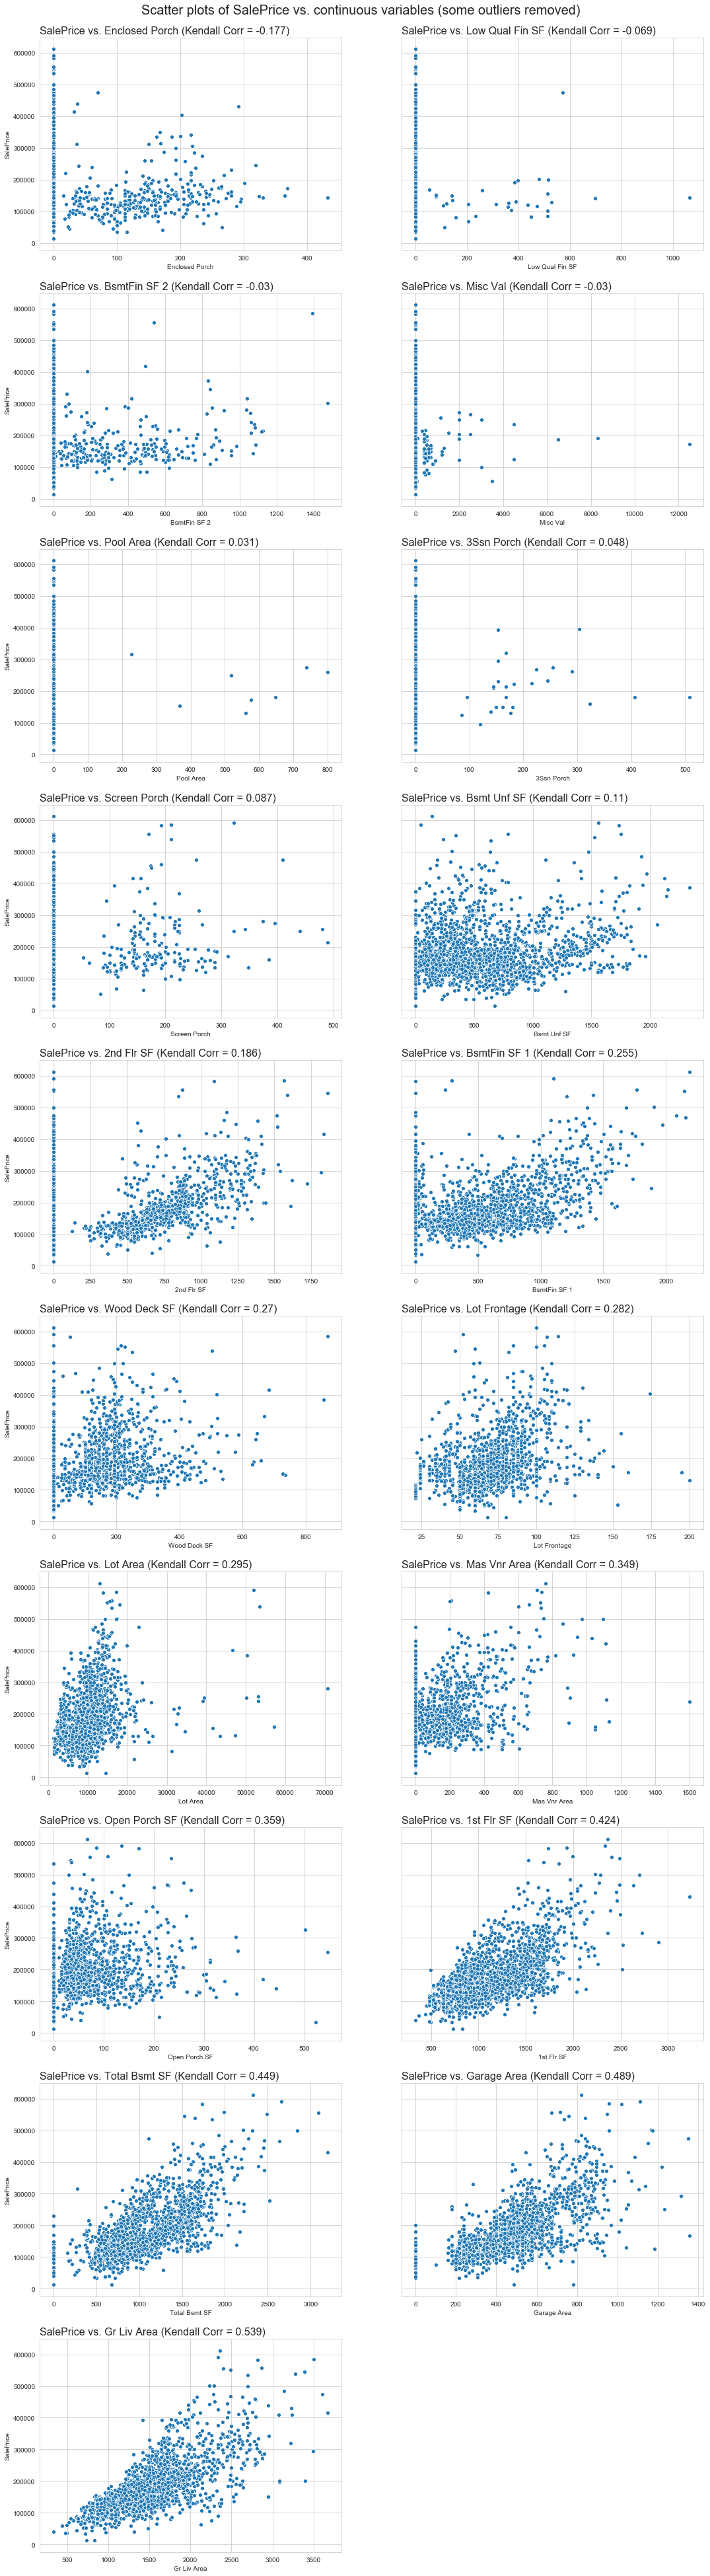

In [31]:
# Plotting the scatter plots again after removing outliers.

fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(18,70), sharey=True)

ax = ax.ravel()

for i, col in enumerate(list(continuous_corr_df.columns)):
    
    sns.scatterplot(data=ce_train, x=col, y='SalePrice', ax=ax[i])
    
    kendall_coef = str(round(ce_train[['SalePrice', col]].corr(method='kendall').iloc[0,1], 3))
    
    ax[i].set_title(f"SalePrice vs. {col} (Kendall Corr = {kendall_coef})", fontsize=16, loc='left')

ax[19].remove()
fig.suptitle(x=0.5, y=0.89, t="Scatter plots of SalePrice vs. continuous variables (some outliers removed)", fontsize=20)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/continuous_vars_scatterplots_wo_outliers.png', bbox_inches='tight')

### EDA of Discrete Variables

In [32]:
# Filtering all columns of discrete variables.
# These columns will be used to calculate the correlation coefficient against 'SalePrice' column.

discrete_corr_df = pd.DataFrame(data_dict.loc[data_dict['Variable type']=='discrete', 'Column name'])

#Creating an extra column 'SalePrice' of 0 values. These values will be replaced with the correlation coefficient.
discrete_corr_df['SalePrice'] = 0

# Setting 'Column name' column as index.
discrete_corr_df.set_index('Column name', inplace=True)

# Transposing the dataframe to make indices into columns.
discrete_corr_df = discrete_corr_df.T

# Dropping the 'Id' column (As explained above, 'Id' column shows observation number. So, it wouldn't make logical sense to include it in the regression model.)
discrete_corr_df.drop(columns=['Id'], inplace=True)

discrete_corr_df

Column name  Year Built  Year Remod/Add  Bsmt Full Bath  Bsmt Half Bath  \
SalePrice             0               0               0               0   

Column name  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
SalePrice            0          0              0              0   

Column name  TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars  Mo Sold  \
SalePrice                0           0              0            0        0   

Column name  Yr Sold  
SalePrice          0

Similar to continuous variables above, to determine which correlation method should be used for discrete variables, I will have to first determine the distribution of each variable itself. According to this [page](https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/), **one of the assumptions for Pearson correlation is that the variables should be normally distributed**. So, if the discrete variable is normally distributed, Pearson correlation will be used. If it is not normally distributed, Kendall correlation will be utilized.

As explained above, this is a justified approach because according to this [page](https://towardsdatascience.com/kendall-rank-correlation-explained-dee01d99c535), "*Kendall rank correlation (non-parametric) is an alternative to Pearson’s correlation (parametric) when the data you’re working with has failed one or more assumptions of the test*."

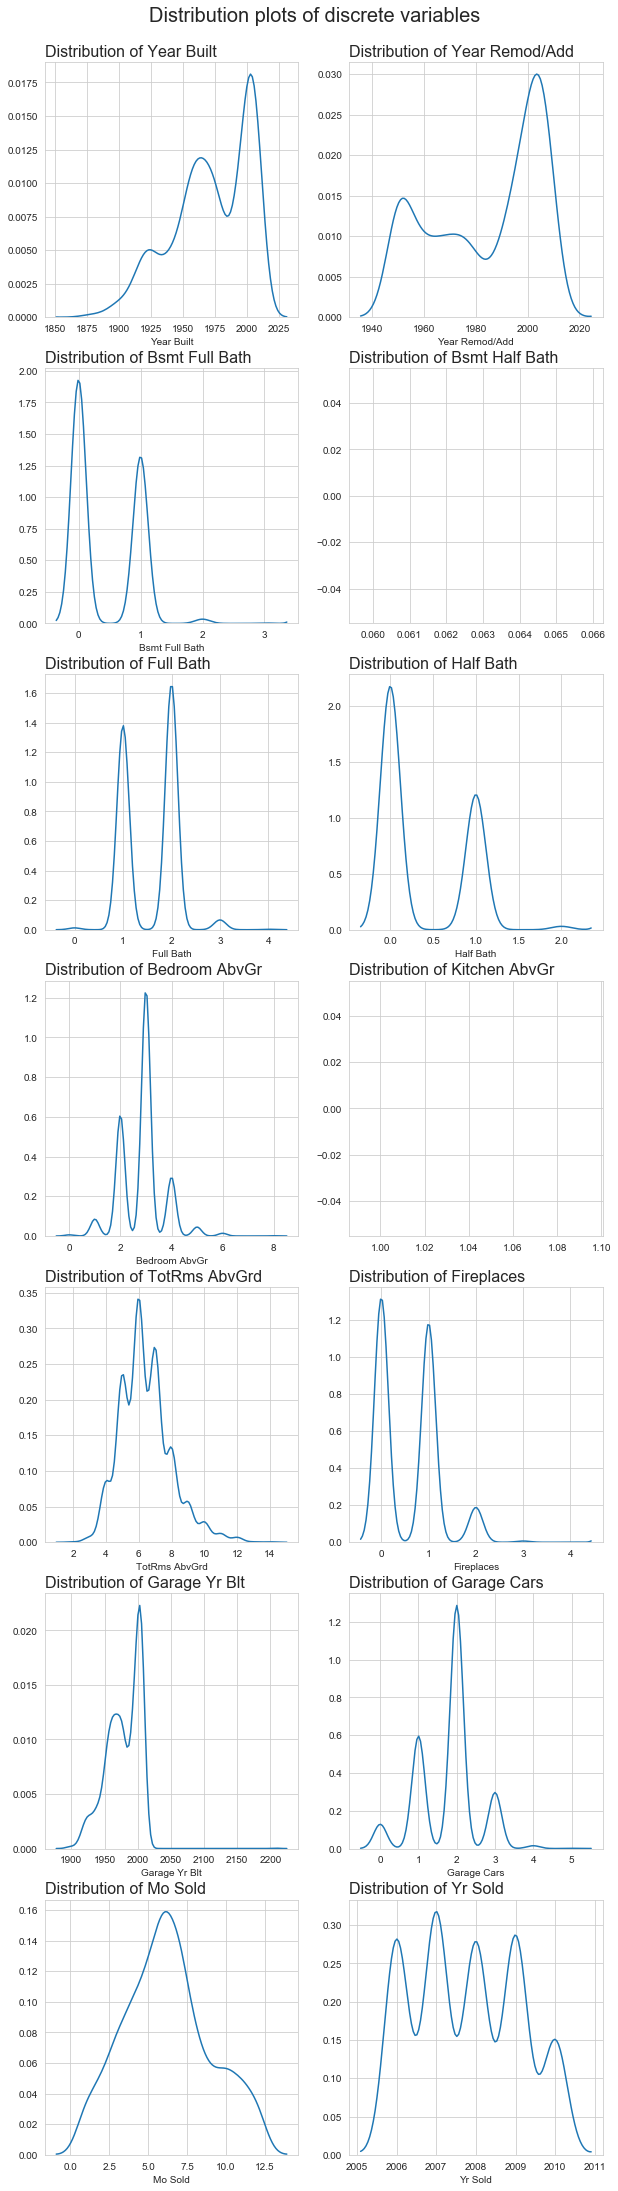

In [33]:
# Plotting distribution plots of all discrete & ordinal variables.

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,38.5))

ax = ax.ravel()

for i, col in enumerate(list(discrete_corr_df.columns)):
    
    ax[i].set_title(f"Distribution of {col}", fontsize=16, loc='left')
    
    # We use try & except because some variables are not normally distributed and throw this error during kde calculation:
    # "RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density." 
    try:
        sns.distplot(ce_train[col], ax=ax[i], hist=False, kde=True)
    except:
        pass

fig.suptitle(x=0.5, y=0.9, t="Distribution plots of discrete variables", fontsize=20)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/discrete_vars_distplots.png', bbox_inches='tight')

From the above distribution plots, we see that **none of the discrete variables are normally distributed**. Hence, I will **use the Kendall correlation method** to determine the correlation between *SalePrice* and discrete variables (instead of the Pearson correlation method).

In [34]:
# Finding the Kendall correlation coefficient for all discrete variable columns.

for col in discrete_corr_df.columns:
    kendall_coef = ce_train[['SalePrice', col]].corr(method='kendall').iloc[0,1]
    discrete_corr_df.loc['SalePrice', col] = kendall_coef

discrete_corr_df

Column name  Year Built  Year Remod/Add  Bsmt Full Bath  Bsmt Half Bath  \
SalePrice      0.500042        0.447749         0.22223       -0.028739   

Column name  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
SalePrice     0.508206   0.268814        0.14783      -0.122376   

Column name  TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars   Mo Sold  \
SalePrice         0.388082    0.417436       0.457047     0.578326  0.027837   

Column name   Yr Sold  
SalePrice   -0.005988

In [35]:
# Sorting values of correlation coefficients

discrete_corr_df.sort_values(by='SalePrice', axis=1, inplace=True)
discrete_corr_df

Column name  Kitchen AbvGr  Bsmt Half Bath   Yr Sold   Mo Sold  Bedroom AbvGr  \
SalePrice        -0.122376       -0.028739 -0.005988  0.027837        0.14783   

Column name  Bsmt Full Bath  Half Bath  TotRms AbvGrd  Fireplaces  \
SalePrice           0.22223   0.268814       0.388082    0.417436   

Column name  Year Remod/Add  Garage Yr Blt  Year Built  Full Bath  Garage Cars  
SalePrice          0.447749       0.457047    0.500042   0.508206     0.578326

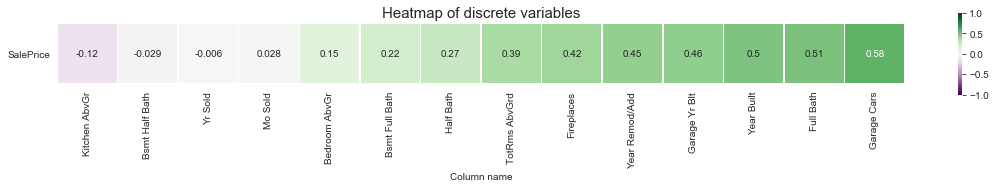

In [36]:
# Plotting the above in a heatmap to visualize the relationship.

plt.figure(figsize=(19,1.5))

sns.heatmap(discrete_corr_df, vmin=-1, vmax=1, annot=True, square=True, linewidths=0.5, cmap='PRGn')

plt.tick_params(axis='y', labelrotation=0)

plt.title("Heatmap of discrete variables", loc='center', fontsize=15)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/discrete_vars_heatmap.png', bbox_inches='tight')

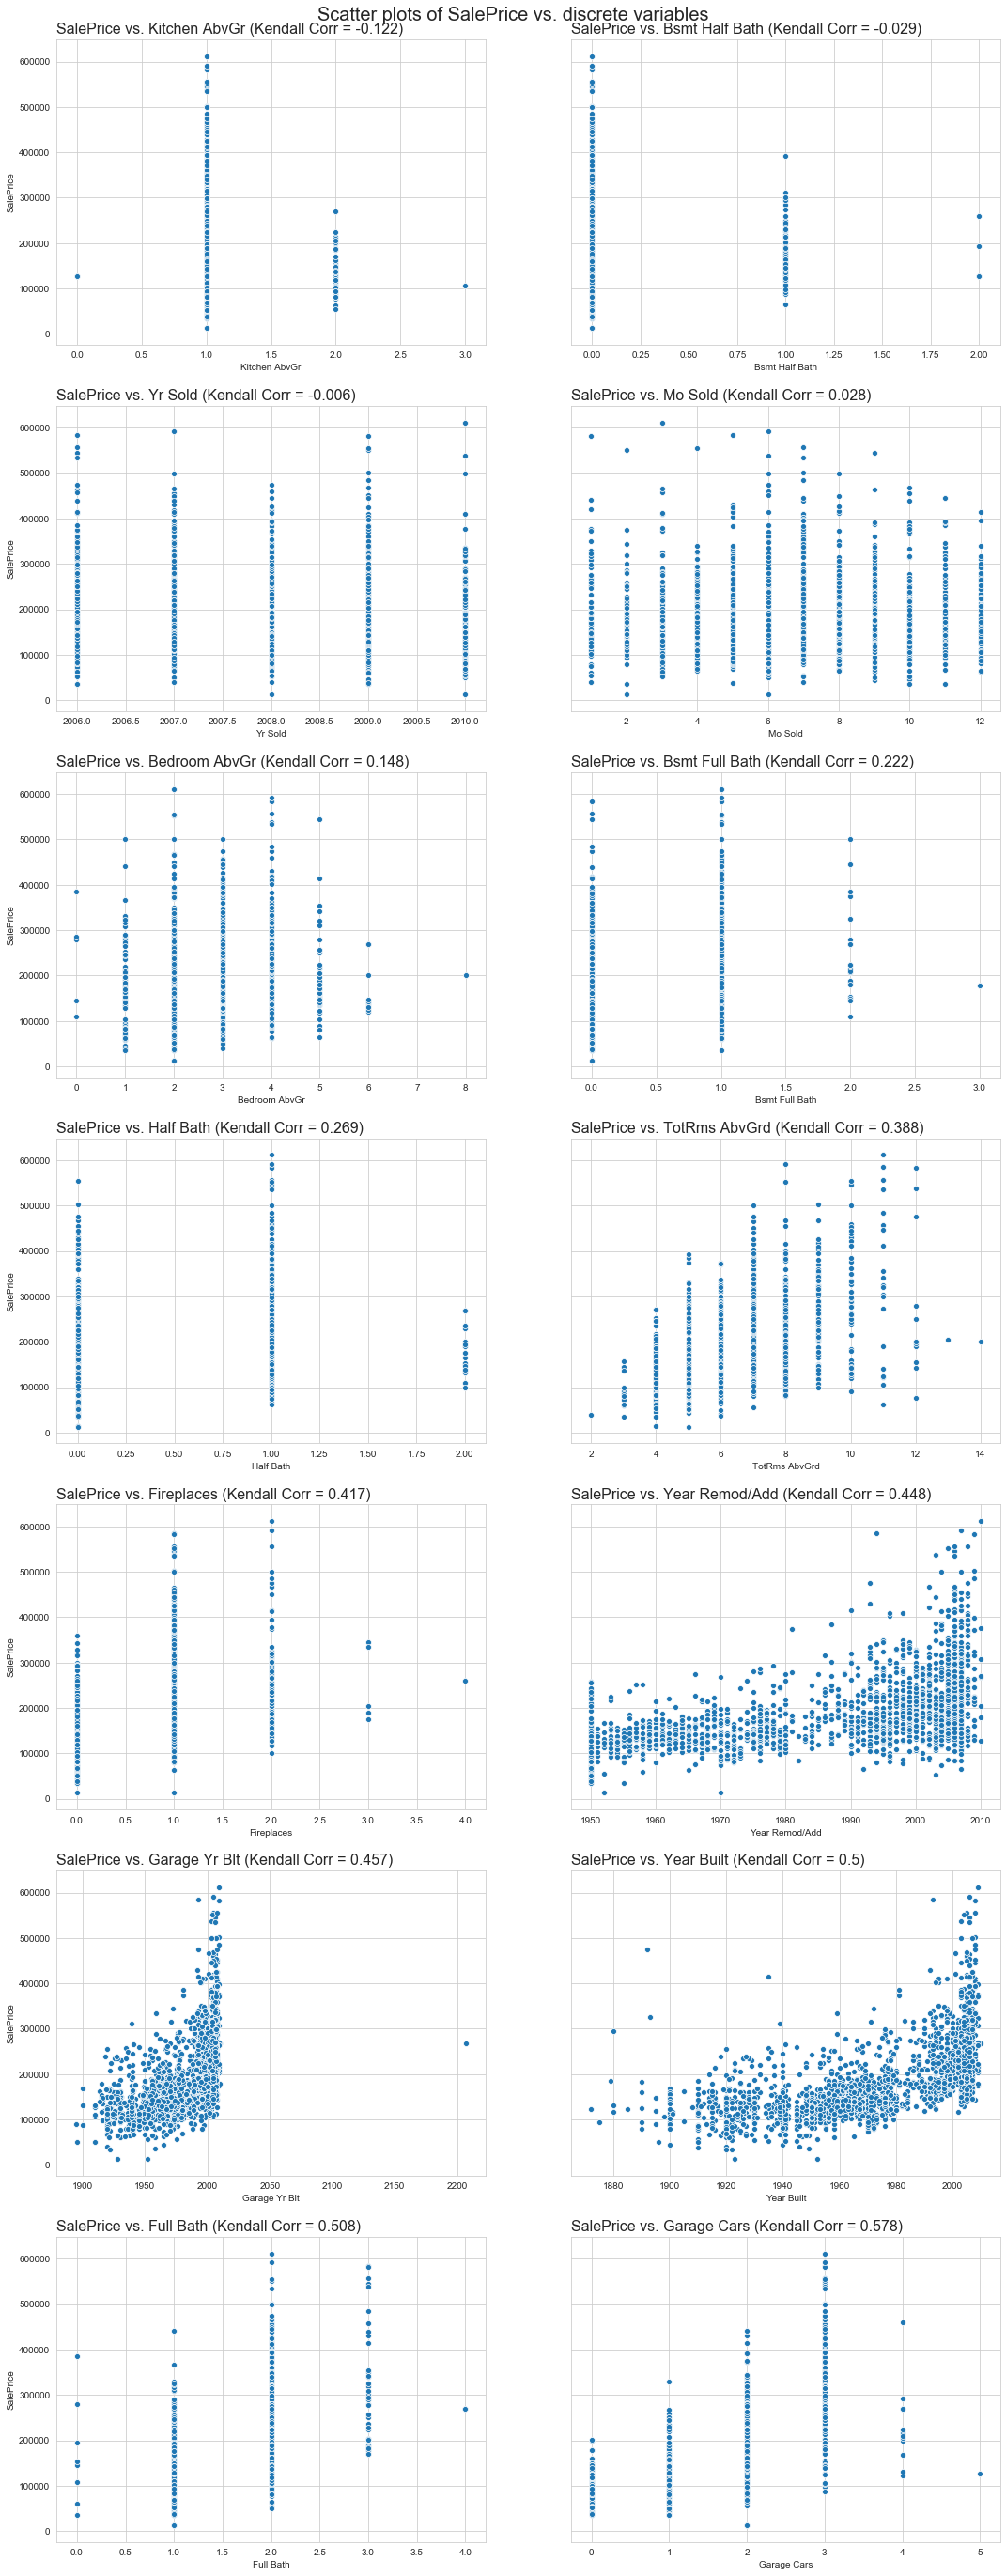

In [37]:
# Plotting the scatter plots of SalePrice vs. discrete variables.

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(18,49), sharey=True)

ax = ax.ravel()

for i, col in enumerate(list(discrete_corr_df.columns)):
    
    sns.scatterplot(data=ce_train, x=col, y='SalePrice', ax=ax[i])
    
    kendall_coef = str(round(ce_train[['SalePrice', col]].corr(method='kendall').iloc[0,1], 3))
    
    ax[i].set_title(f"SalePrice vs. {col} (Kendall Corr = {kendall_coef})", fontsize=16, loc='left')

fig.suptitle(x=0.5, y=0.89, t="Scatter plots of SalePrice vs. discrete variables", fontsize=20)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/discrete_vars_scatterplots.png', bbox_inches='tight')

From the above heatmap and scatter plots, I deduce the following about discrete variables:

- **Presence of outliers**: *'Garage Yr Blt'* has an outlier, which is clearly wrong (year built cannot be more than the present). This outlier will be removed before proceeding.
- **Variables selected for next stage**: From the heatmap, I will select variables which have Kendall correlation coefficient of <= -0.2 & >= 0.2. This threshold is chosen because, while it only represents a small degree of association between the variable and *SalePrice*, it filters out an appropriate number of variables for me to proceed with to the next stage of feature selection and model building and evaluation.

So, the columns selected from this stage are: *'Bsmt Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Fireplaces', 'Year Remod/Add', 'Garage Yr Blt', 'Year Built', 'Full Bath', & 'Garage Cars'*.

In [38]:
# Filtering all selected variables for next stage.

discrete_selected_list = list(discrete_corr_df.T[(discrete_corr_df.T['SalePrice'] >= 0.2) | (discrete_corr_df.T['SalePrice'] <= -0.2)].index)
discrete_selected_list

['Bsmt Full Bath',
 'Half Bath',
 'TotRms AbvGrd',
 'Fireplaces',
 'Year Remod/Add',
 'Garage Yr Blt',
 'Year Built',
 'Full Bath',
 'Garage Cars']

In [39]:
# Filtering rows of outliers

# Creating masks for outliers
outlier_mask1 = ce_train['Garage Yr Blt']>2020

outliers_discrete = ce_train[(outlier_mask1)]
outliers_discrete

Id          PID  Lot Frontage  Lot Area  Lot Shape  Utilities  \
1694  2261.0  916384070.0          68.0    8298.0        3.0        4.0   

      Land Slope  Overall Qual  Overall Cond  Year Built  ...  \
1694         3.0           8.0           5.0      2006.0  ...   

      Misc Feature_Shed  Misc Feature_TenC  Sale Type_CWD  Sale Type_Con  \
1694                  0                  0              0              0   

      Sale Type_ConLD  Sale Type_ConLI  Sale Type_ConLw  Sale Type_New  \
1694                0                0                0              1   

      Sale Type_Oth  Sale Type_WD   
1694              0              0  

[1 rows x 213 columns]

In [40]:
# Dropping the above row of outlier from ce_train dataframe.

ce_train.drop(index=outliers_discrete.index, inplace=True)
ce_train.shape

(2037, 213)

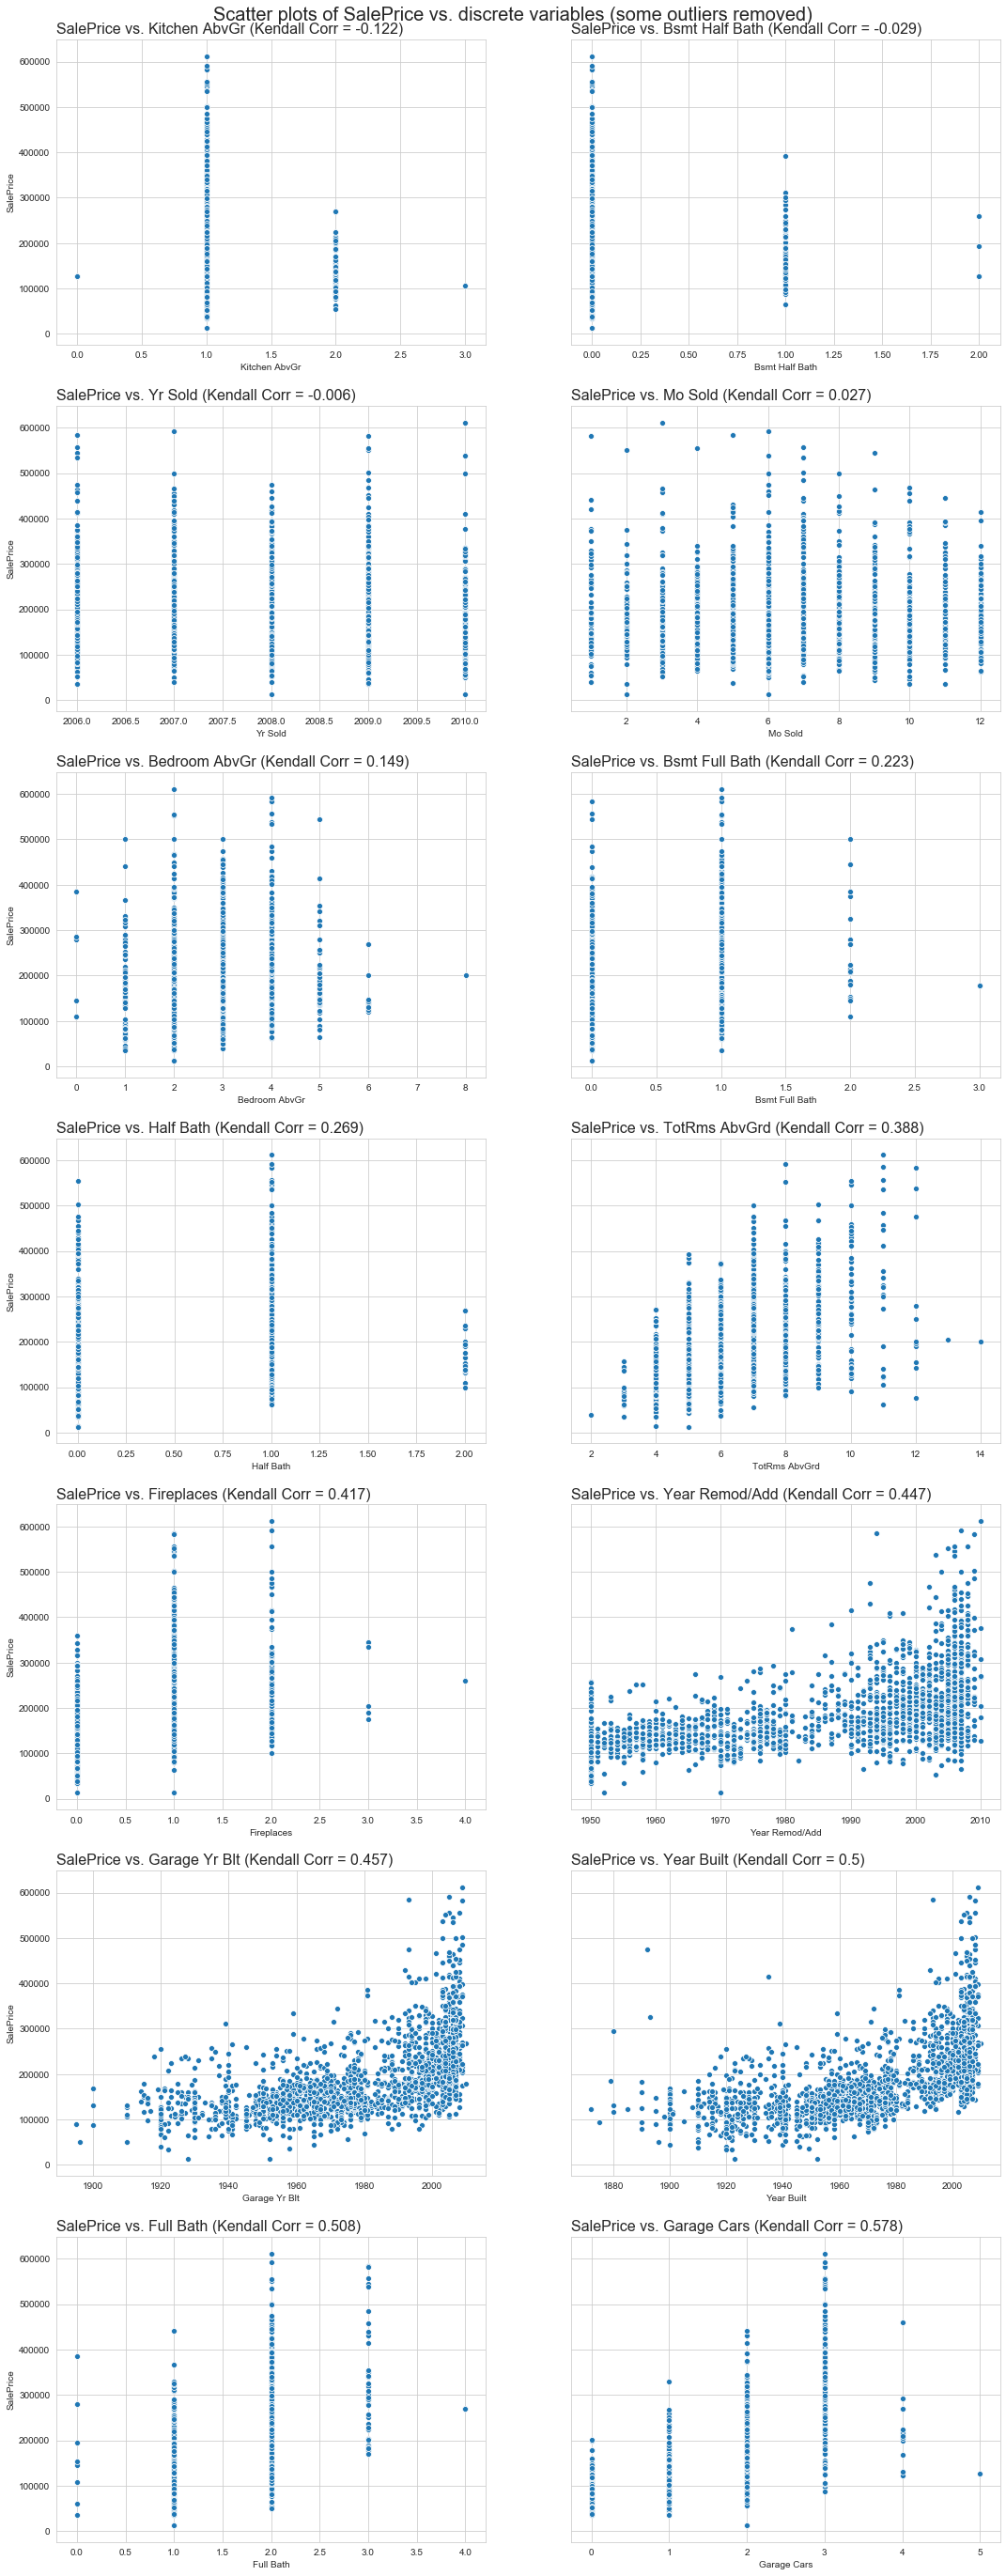

In [41]:
# Plotting the scatter plots again after removing outliers.

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(18,49), sharey=True)

ax = ax.ravel()

for i, col in enumerate(list(discrete_corr_df.columns)):
    
    sns.scatterplot(data=ce_train, x=col, y='SalePrice', ax=ax[i])
    
    kendall_coef = str(round(ce_train[['SalePrice', col]].corr(method='kendall').iloc[0,1], 3))
    
    ax[i].set_title(f"SalePrice vs. {col} (Kendall Corr = {kendall_coef})", fontsize=16, loc='left')

fig.suptitle(x=0.5, y=0.89, t="Scatter plots of SalePrice vs. discrete variables (some outliers removed)", fontsize=20)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/discrete_vars_scatterplots_wo_outliers.png', bbox_inches='tight')

### EDA of Ordinal Variables

In [42]:
# Filtering all columns of ordinal variables.
# These columns will be used to calculate the correlation coefficient against 'SalePrice' column.

ordinal_corr_df = pd.DataFrame(data_dict.loc[data_dict['Variable type']=='ordinal', 'Column name'])

#Creating an extra column 'SalePrice' of 0 values. These values will be replaced with the correlation coefficient.
ordinal_corr_df['SalePrice'] = 0

# Setting 'Column name' column as index.
ordinal_corr_df.set_index('Column name', inplace=True)

# Transposing the dataframe to make indices into columns.
ordinal_corr_df = ordinal_corr_df.T

ordinal_corr_df

Column name  Lot Shape  Utilities  Land Slope  Overall Qual  Overall Cond  \
SalePrice            0          0           0             0             0   

Column name  Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  ...  \
SalePrice             0           0          0          0              0  ...   

Column name  Electrical  Kitchen Qual  Functional  Fireplace Qu  \
SalePrice             0             0           0             0   

Column name  Garage Finish  Garage Qual  Garage Cond  Paved Drive  Pool QC  \
SalePrice                0            0            0            0        0   

Column name  Fence  
SalePrice        0  

[1 rows x 23 columns]

According to this [page](https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/), Spearman rank correlation should be used when the variables being studied are measured on an ordinal scale. So, I will **use the Spearman correlation method** to determine the correlation between *SalePrice* and ordinal variables (instead of the Pearson or Kendall correlation method).

In [43]:
# Finding the Spearman correlation coefficient for all discrete variable columns.

for col in ordinal_corr_df.columns:
    spearman_coef = ce_train[['SalePrice', col]].corr(method='spearman').iloc[0,1]
    ordinal_corr_df.loc['SalePrice', col] = spearman_coef

ordinal_corr_df

Column name  Lot Shape  Utilities  Land Slope  Overall Qual  Overall Cond  \
SalePrice    -0.360464   0.036605   -0.045598      0.809084     -0.160724   

Column name  Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  ...  \
SalePrice      0.699024    0.031576   0.699877   0.282075       0.386144  ...   

Column name  Electrical  Kitchen Qual  Functional  Fireplace Qu  \
SalePrice      0.307633      0.683706    0.128762       0.54155   

Column name  Garage Finish  Garage Qual  Garage Cond  Paved Drive   Pool QC  \
SalePrice         0.637666      0.36933     0.341743     0.350623  0.037785   

Column name     Fence  
SalePrice   -0.184658  

[1 rows x 23 columns]

In [44]:
# Sorting values of correlation coefficients

ordinal_corr_df.sort_values(by='SalePrice', axis=1, inplace=True)
ordinal_corr_df

Column name  Lot Shape     Fence  Overall Cond  Land Slope  Exter Cond  \
SalePrice    -0.360464 -0.184658     -0.160724   -0.045598    0.031576   

Column name  Utilities   Pool QC  BsmtFin Type 2  Functional  Bsmt Cond  ...  \
SalePrice     0.036605  0.037785        0.044873    0.128762   0.282075  ...   

Column name  Garage Qual  Bsmt Exposure  BsmtFin Type 1  Heating QC  \
SalePrice        0.36933       0.386144        0.415195    0.520904   

Column name  Fireplace Qu  Garage Finish  Kitchen Qual  Exter Qual  Bsmt Qual  \
SalePrice         0.54155       0.637666      0.683706    0.699024   0.699877   

Column name  Overall Qual  
SalePrice        0.809084  

[1 rows x 23 columns]

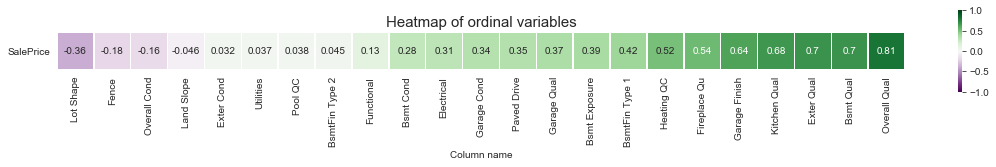

In [45]:
# Plotting the above in a heatmap to visualize the relationship.

plt.figure(figsize=(19,1.5))

sns.heatmap(ordinal_corr_df, vmin=-1, vmax=1, annot=True, square=True, linewidths=0.5, cmap='PRGn')

plt.tick_params(axis='y', labelrotation=0)

plt.title("Heatmap of ordinal variables", loc='center', fontsize=15)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/ordinal_vars_heatmap.png', bbox_inches='tight')

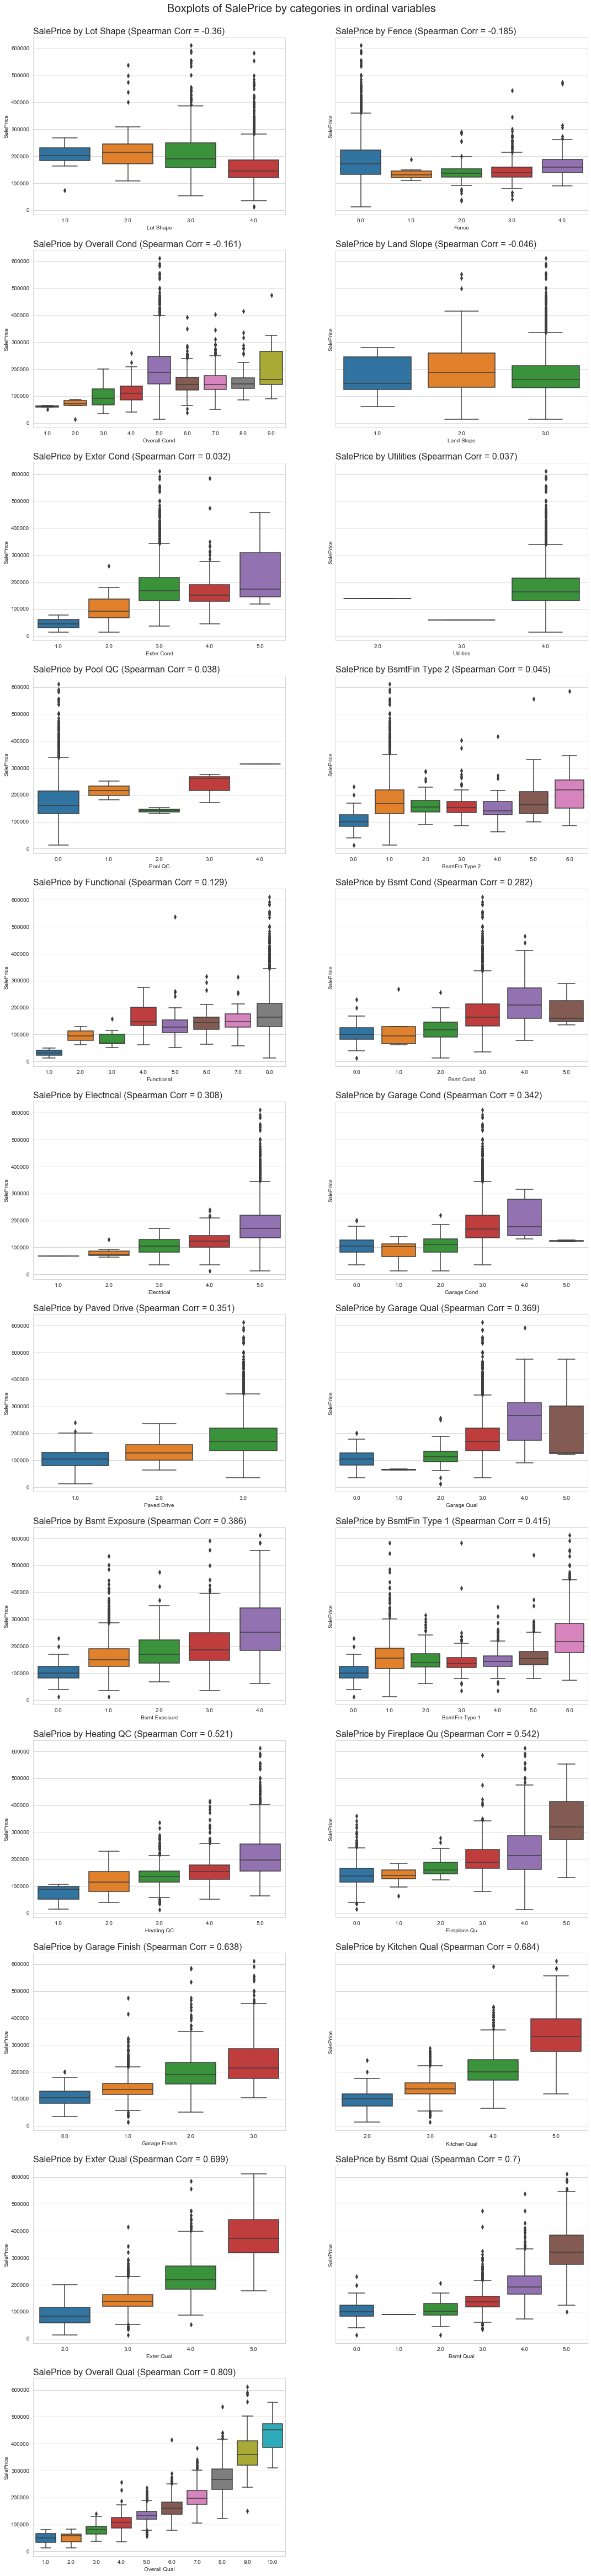

In [46]:
# Plotting the boxplots of ordinal variables by ranked categories against SalePrice.

fig, ax = plt.subplots(nrows=12, ncols=2, figsize=(18,84), sharey=True)

ax = ax.ravel()

for i, col in enumerate(list(ordinal_corr_df.columns)):
    
    sns.boxplot(data=ce_train, x=col, y='SalePrice', ax=ax[i])
    
    spearman_coef = str(round(ce_train[['SalePrice', col]].corr(method='spearman').iloc[0,1], 3))
    
    ax[i].set_title(f"SalePrice by {col} (Spearman Corr = {spearman_coef})", fontsize=16, loc='left')

ax[23].remove()
    
fig.suptitle(x=0.5, y=0.89, t="Boxplots of SalePrice by categories in ordinal variables", fontsize=20)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/ordinal_vars_boxplots.png', bbox_inches='tight')

From the above heatmap and boxplots, I deduce the following about ordinal categorical variables:

- **Presence of outliers**: There seems to be a presence of multiple points outside the whisker ranges in all of the boxplots above (*whis=1.5* by default). However, **these points should not be termed as outliers directly**, as there are a large number of such points (which means they do represent the nature of the data spread in some way). So, these points should not be removed before proceeding.
- **Variables selected for next stage**: From the heatmap, I will select variables which have a Spearman correlation coefficient of <= -0.2 & >= 0.2. This threshold is chosen because, while it only represents a small degree of association between the variable and *SalePrice*, it filters out an appropriate number of variables for me to proceed with to the next stage of feature selection and model building and evaluation.

So, the columns selected from this stage are: *'Lot Shape', 'Bsmt Cond', 'Electrical', 'Garage Cond', 'Paved Drive', 'Garage Qual', 'Bsmt Exposure', 'BsmtFin Type 1', 'Heating QC', 'Fireplace Qu', 'Garage Finish', 'Kitchen Qual', 'Exter Qual', 'Bsmt Qual' & 'Overall Qual'*.

In [47]:
# Filtering all selected variables for next stage.

ordinal_selected_list = list(ordinal_corr_df.T[(ordinal_corr_df.T['SalePrice'] >= 0.2) | (ordinal_corr_df.T['SalePrice'] <= -0.2)].index)
ordinal_selected_list

['Lot Shape',
 'Bsmt Cond',
 'Electrical',
 'Garage Cond',
 'Paved Drive',
 'Garage Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Heating QC',
 'Fireplace Qu',
 'Garage Finish',
 'Kitchen Qual',
 'Exter Qual',
 'Bsmt Qual',
 'Overall Qual']

### EDA of Nominal Variables

In [48]:
# Filtering all columns of nominal variables.
# These columns will be used to calculate the correlation coefficient against 'SalePrice' column.

nominal_cols_list = list(data_dict.loc[data_dict['Variable type']=='nominal', 'Column name'])
nominal_cols_list

# Dropping the 'PID' column (As explained above, 'PID' column shows parcel identification number. So, it wouldn't make logical sense to include it in the regression model.)
nominal_cols_list.remove('PID')
nominal_cols_list

['MS SubClass',
 'MS Zoning',
 'Street',
 'Alley',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Heating',
 'Central Air',
 'Garage Type',
 'Misc Feature',
 'Sale Type']

According to this [page](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9) and this [page](https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792), Pearson's R statistic calculation method (used in *df.corr()* method) is not the best correlation coefficient for categorical variables, esp. for nominal ones. So, I will **use the Kendall correlation method** to determine the correlation between *SalePrice* and nominal variables (instead of the Pearson or Spearman correlation method).

In [49]:
# Creating a dictionary with keys as column names from the list nominal_cols_list,
# and values as a dataframe of all one-hot encoded categories of that particular column.

nominal_cols_dict = {}

for col in nominal_cols_list:
    one_hot_list = [_ for _ in ce_train.columns if col in _]
    
    # Taking care to remove 'Heating QC' column from being incorrectly detected as a one-hot encoded category for the 'Heating' column by the above line of code.
    if col=='Heating':
        one_hot_list.remove('Heating QC')
    
    nominal_cols_dict[col] = pd.DataFrame(data=0, columns=one_hot_list, index=['SalePrice'])

In [50]:
# From above, I obtain a dictionary with keys as all nominal columns and values as individual dataframes of all the one-hot encoded columns.
# For instance, for 'Bldg Type' nominal variable, I have:

nominal_cols_dict['Bldg Type']

Bldg Type_2fmCon  Bldg Type_Duplex  Bldg Type_Twnhs  \
SalePrice                 0                 0                0   

           Bldg Type_TwnhsE  
SalePrice                 0

In [51]:
# Finding the Kendall correlation coefficient for all nominal variable columns.

for col, df in nominal_cols_dict.items():
    for df_col in df.columns:
        kendall_coef = ce_train[['SalePrice', df_col]].corr(method='kendall').iloc[0,1]
        df.loc['SalePrice', df_col] = kendall_coef
    
    # Sorting values of correlation coefficients
    df.sort_values(by='SalePrice', axis=1, inplace=True)

In [52]:
# After running the code in above cell, we have:

nominal_cols_dict['Bldg Type']

Bldg Type_2fmCon  Bldg Type_Twnhs  Bldg Type_Duplex  \
SalePrice         -0.114522        -0.105182         -0.096811   

           Bldg Type_TwnhsE  
SalePrice          0.084711

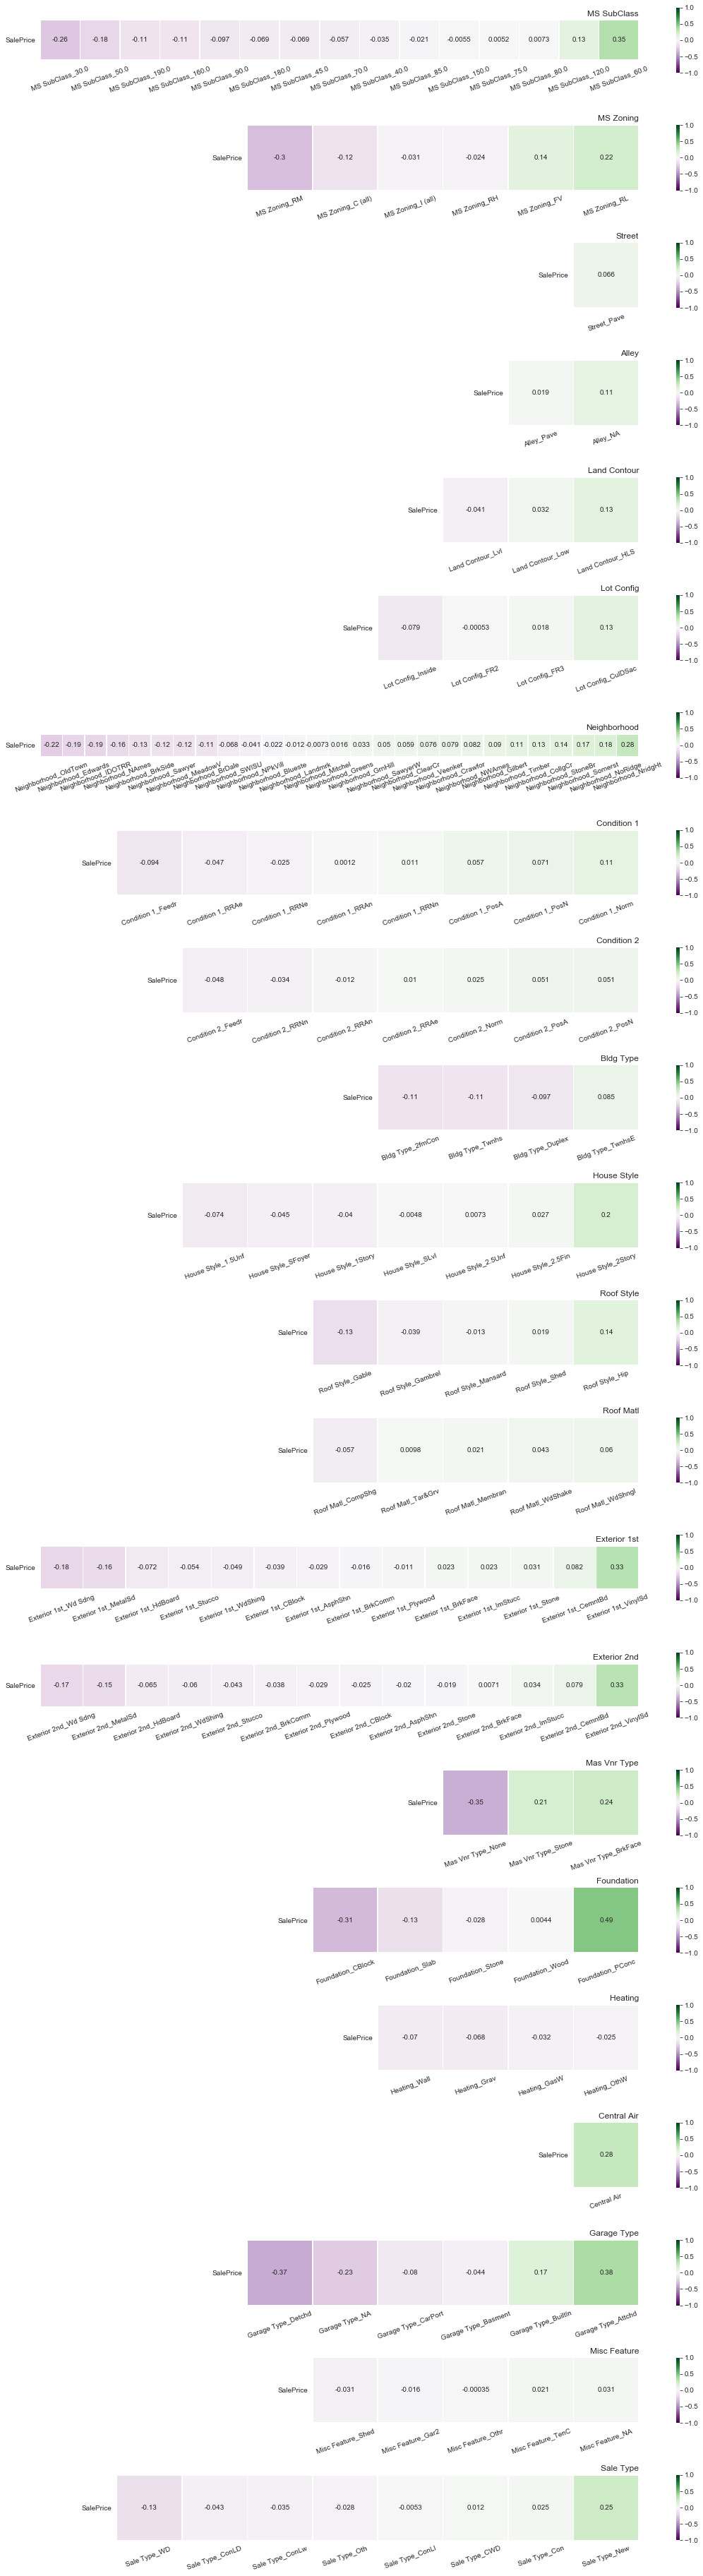

In [53]:
# Plotting the above in a heatmap subplots to visualize the relationships.

fig, ax = plt.subplots(nrows=22, ncols=1, figsize=(19,66))

ax = ax.ravel()

for i, col in enumerate(nominal_cols_dict):

    sns.heatmap(nominal_cols_dict[col], vmin=-1, vmax=1, annot=True, ax=ax[i], square=True, linewidths=0.5, cmap='PRGn')
    
    # Setting the title and x- and y-axis label rotation.
    ax[i].set_title(col, loc='right')
    ax[i].tick_params(axis='x', labelrotation=20)
    ax[i].tick_params(axis='y', labelrotation=0)

# Adjusting the horizontal space between subplots to make the figure more clear.
plt.subplots_adjust(hspace=0.8)
    
# Exporting plot image in PNG format.
plt.savefig('../plot_images/nominal_vars_heatmap.png', bbox_inches='tight')

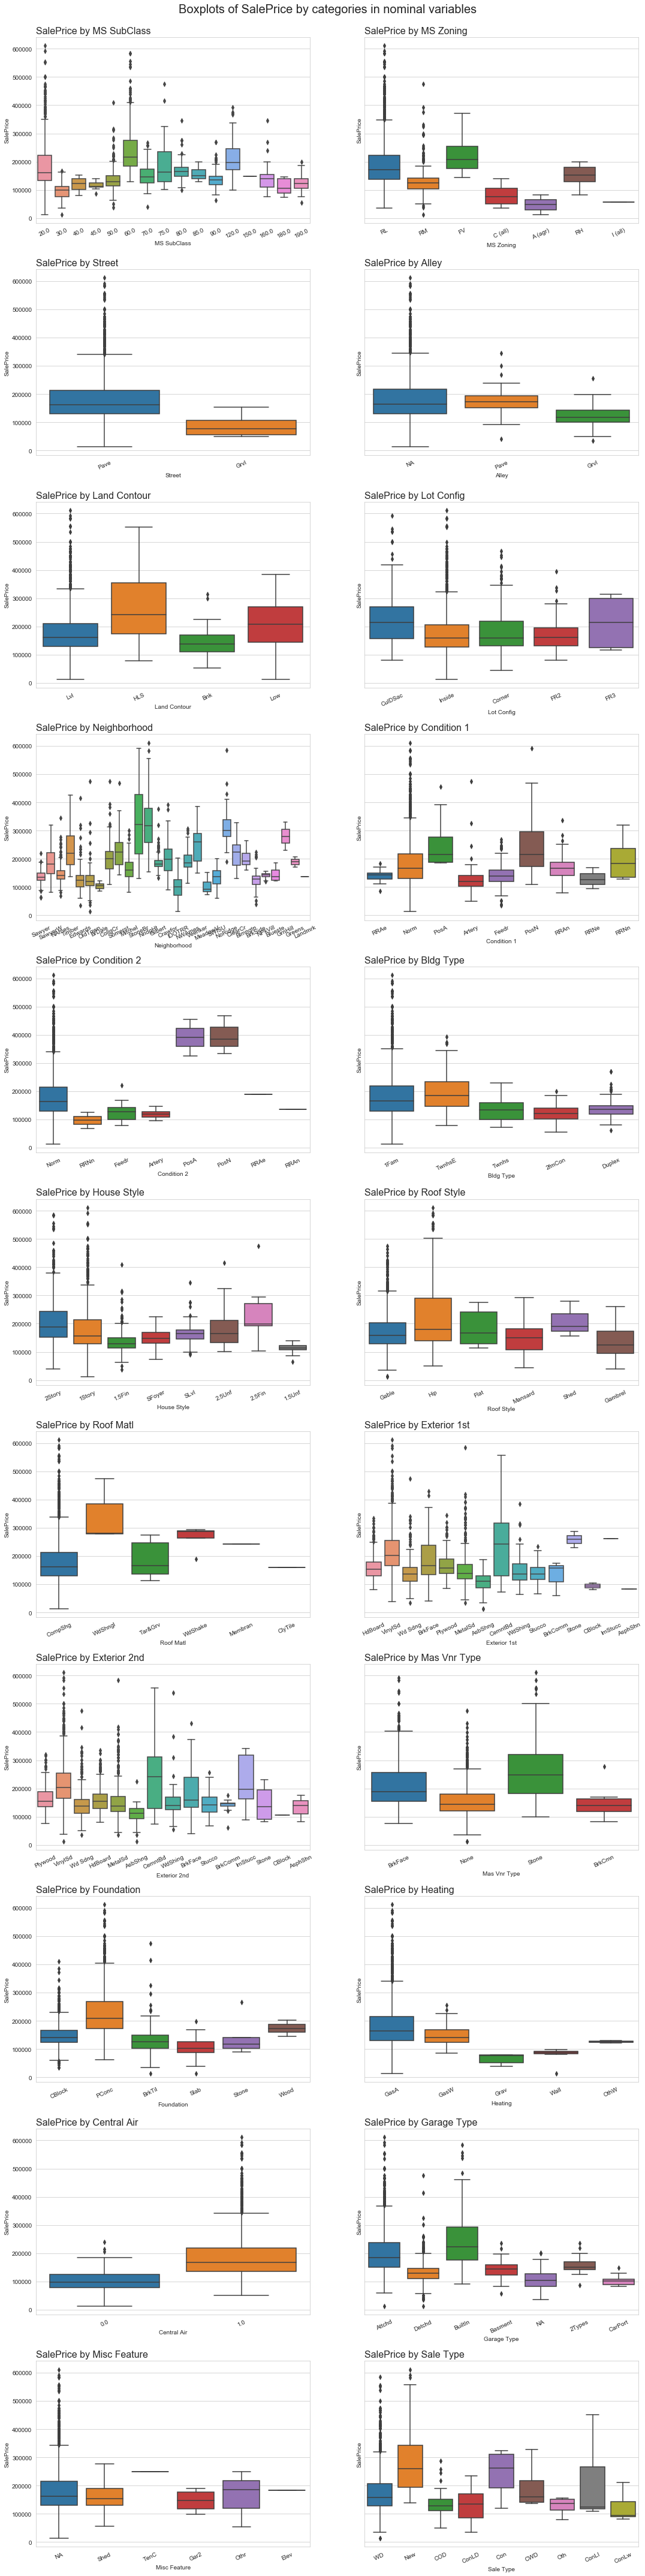

In [54]:
# Plotting the boxplots of nominal variables by categories against SalePrice.

fig, ax = plt.subplots(nrows=11, ncols=2, figsize=(18,77), sharey=True)

ax = ax.ravel()

for i, col in enumerate(nominal_cols_dict):
    
    sns.boxplot(data=c_train, x=col, y='SalePrice', ax=ax[i])
    
    # Setting the title and x- and y-axis label rotation.
    ax[i].set_title(f"SalePrice by {col}", fontsize=16, loc='left')
    ax[i].tick_params(axis='x', labelrotation=25)
    ax[i].tick_params(axis='y', labelrotation=0)
    
fig.suptitle(x=0.5, y=0.89, t="Boxplots of SalePrice by categories in nominal variables", fontsize=20)

# Adjusting the horizontal space between subplots to make the figure more clear.
plt.subplots_adjust(hspace=0.25)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/nominal_vars_boxplots.png', bbox_inches='tight')

From the above heatmap and boxplots, I deduce the following about nominal categorical variables:

- **Presence of outliers**: Similar to ordinal variables above, there seems to be a presence of multiple points outside the whisker ranges in all of the boxplots above (*whis=1.5* by default). However, **these points should not be termed as outliers directly**, as there are a large number of such points (which means they do represent the nature of the data spread in some way). So, these points should not be removed before proceeding.
- **Variables selected for next stage**: From the heatmap, I will select variables which have Kendall correlation coefficient of <= -0.2 & >= 0.2. This threshold is chosen because, while it only represents a small degree of association between the variable and *SalePrice*, it filters out an appropriate number of variables for me to proceed with to the next stage of feature selection and model building and evaluation.

So, the columns selected from this stage are: *'MS SubClass_30.0', 'MS SubClass_60.0', 'MS Zoning_RM', 'MS Zoning_RL', 'Neighborhood_OldTown', 'Neighborhood_NridgHt', 'House Style_2Story', 'Exterior 1st_VinylSd', 'Exterior 2nd_VinylSd', 'Mas Vnr Type_None', 'Mas Vnr Type_Stone', 'Mas Vnr Type_BrkFace', 'Foundation_CBlock', 'Foundation_PConc', 'Heating QC', 'Central Air', 'Garage Type_Detchd', 'Garage Type_NA', 'Garage Type_Attchd' & 'Sale Type_New'*.

In [55]:
# Filtering all selected variables for next stage.

nominal_selected_list = []

for col in nominal_cols_dict.keys():
    nominal_selected_list += list(nominal_cols_dict[col].T[(nominal_cols_dict[col].T['SalePrice'] >= 0.2) | (nominal_cols_dict[col].T['SalePrice'] <= -0.2)].index)

nominal_selected_list

['MS SubClass_30.0',
 'MS SubClass_60.0',
 'MS Zoning_RM',
 'MS Zoning_RL',
 'Neighborhood_OldTown',
 'Neighborhood_NridgHt',
 'House Style_2Story',
 'Exterior 1st_VinylSd',
 'Exterior 2nd_VinylSd',
 'Mas Vnr Type_None',
 'Mas Vnr Type_Stone',
 'Mas Vnr Type_BrkFace',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Central Air',
 'Garage Type_Detchd',
 'Garage Type_NA',
 'Garage Type_Attchd',
 'Sale Type_New']

### Correlations between Selected Variables

#### Multiple Linear Regression (MLR) - Assumption 2

Now that I have a list of variables that are (somewhat) linearly related to the target variable *SalePrice*, I will consider another assumption of MLR, which is that of **independence of predictors** - *the predictor variables must be indepdent of one another*. High correlation between variables can cause a variety of problems in our interpretation of the machine learning models built. When highly-correlated variables exist in a model, we can no longer interpret a coefficient on a variable as the effect on the target of a one unit increase in that variable while holding the other variables constant. This is because in case of highly-correlated variables, there is not a scenario in which one variable can change without a conditional change in another variable.

In order to explore this, I will determine the correlation of all selected variables with one another, and then drop any variables from the list which have a high correlation coefficient (> 0.8). **Kendall correlation method would be best suited for this, since we are comparing continuous, discrete & categorical (ordinal & nominal) variables with one another**.

In [56]:
continuous_selected_list

['BsmtFin SF 1',
 'Wood Deck SF',
 'Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'Open Porch SF',
 '1st Flr SF',
 'Total Bsmt SF',
 'Garage Area',
 'Gr Liv Area']

In [57]:
discrete_selected_list

['Bsmt Full Bath',
 'Half Bath',
 'TotRms AbvGrd',
 'Fireplaces',
 'Year Remod/Add',
 'Garage Yr Blt',
 'Year Built',
 'Full Bath',
 'Garage Cars']

In [58]:
ordinal_selected_list

['Lot Shape',
 'Bsmt Cond',
 'Electrical',
 'Garage Cond',
 'Paved Drive',
 'Garage Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Heating QC',
 'Fireplace Qu',
 'Garage Finish',
 'Kitchen Qual',
 'Exter Qual',
 'Bsmt Qual',
 'Overall Qual']

In [59]:
nominal_selected_list

['MS SubClass_30.0',
 'MS SubClass_60.0',
 'MS Zoning_RM',
 'MS Zoning_RL',
 'Neighborhood_OldTown',
 'Neighborhood_NridgHt',
 'House Style_2Story',
 'Exterior 1st_VinylSd',
 'Exterior 2nd_VinylSd',
 'Mas Vnr Type_None',
 'Mas Vnr Type_Stone',
 'Mas Vnr Type_BrkFace',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Central Air',
 'Garage Type_Detchd',
 'Garage Type_NA',
 'Garage Type_Attchd',
 'Sale Type_New']

In [60]:
# Combining lists of all types selected variables.

selected_var_list = continuous_selected_list + discrete_selected_list + ordinal_selected_list + nominal_selected_list
len(selected_var_list)

53

In [61]:
# Finding the Kendall correlation coefficient for all selected variable columns.

selected_var_corr_df = ce_train[selected_var_list].corr(method='kendall')

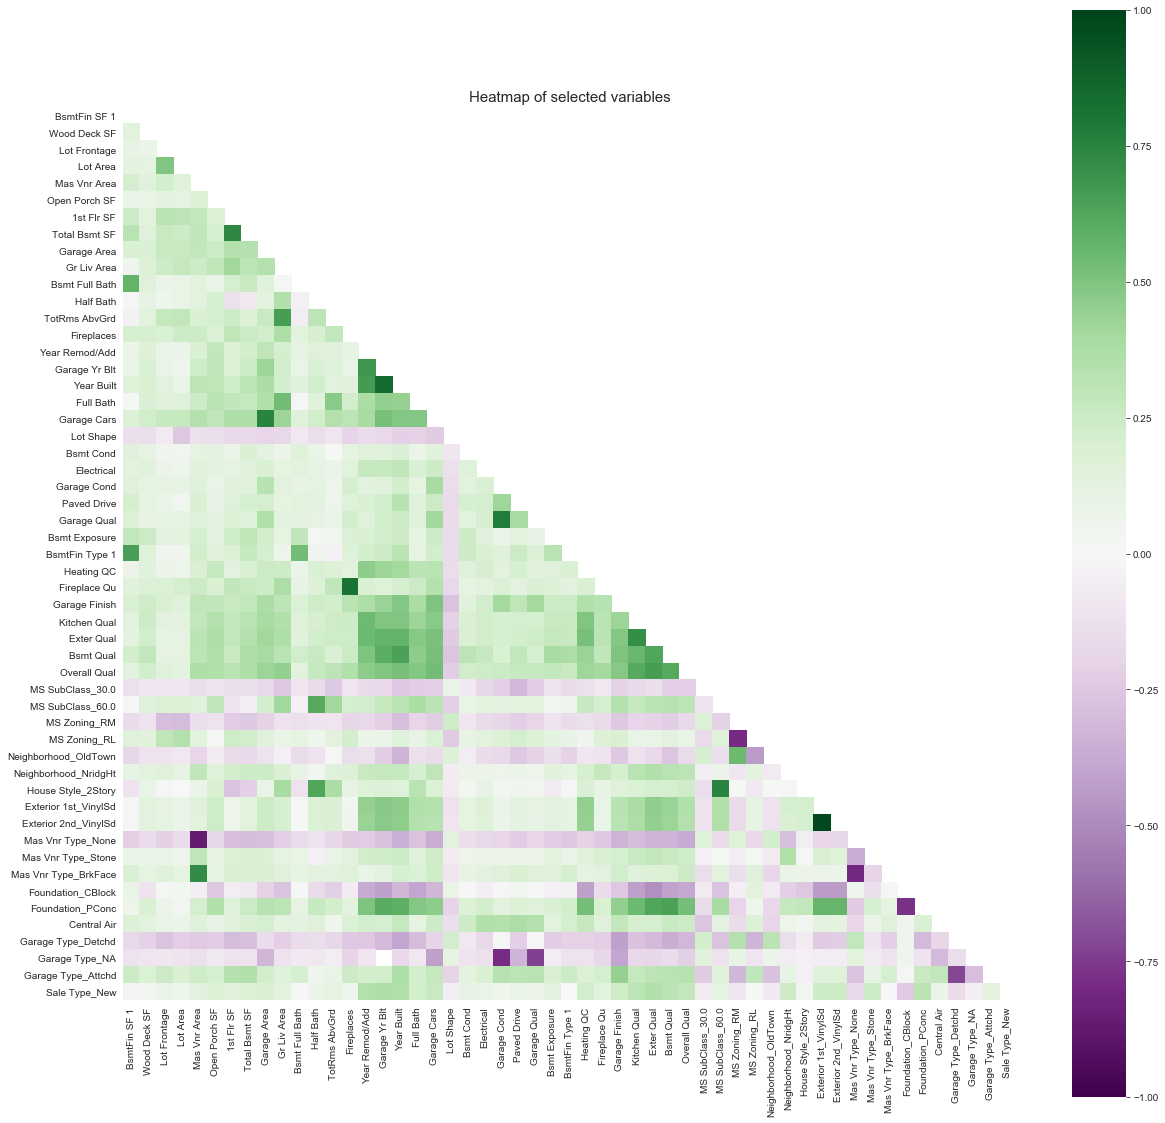

In [62]:
# Plotting the above in a heatmap to visualize the relationships.

plt.figure(figsize=(20,20))

# Generating a mask for the upper triangle.
mask = np.zeros_like(selected_var_corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(selected_var_corr_df, vmin=-1, vmax=1, mask=mask, square=True, cmap='PRGn')

plt.title("Heatmap of selected variables", loc='center', fontsize=15)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/selected_vars_heatmap.png', bbox_inches='tight')

The above heatmap is overwhelming, but we can see that **there are a few predictor variables that are highly correlated with each other and may not be independent**. I will determine these correlated predictors in the code below.

In [63]:
# Finding the highly correlated (non-indepdent) variables.

non_indep_var_list = []

for i in range(len(selected_var_corr_df.columns)):
    
    for j in range(i):
        
        if abs(selected_var_corr_df.iloc[i, j]) > 0.8:
            col = selected_var_corr_df.columns[i]
            non_indep_var_list.append(col)

non_indep_var_list

['Year Built',
 'Fireplace Qu',
 'MS Zoning_RL',
 'Exterior 2nd_VinylSd',
 'Mas Vnr Type_None',
 'Mas Vnr Type_BrkFace']

In [64]:
# Finding the highly correlated (non-indepdent) variables.
# Here we determine the variables that the above obtained variabled are related to.
# This is done so that I can choose which variable is better to be dropped, considering how many rows of missing data are in that column.

non_indep_var_list_2 = []

for i in range(len(selected_var_corr_df.columns)):
    
    for j in range(i):
        
        if abs(selected_var_corr_df.iloc[i, j]) > 0.8:
            col = selected_var_corr_df.columns[j]
            non_indep_var_list_2.append(col)

non_indep_var_list_2

['Garage Yr Blt',
 'Fireplaces',
 'MS Zoning_RM',
 'Exterior 1st_VinylSd',
 'Mas Vnr Area',
 'Mas Vnr Type_None']

In [65]:
# Checking list of columns which have one or more rows with np.nan values (list filtered at the beginning of the notebook).
# This is the number of remaining missing values in the dataframe.
# I will consider imputing this missing data if these columns are absolutely required in the regression model.

null_cols_ce_train

Lot Frontage     330
Mas Vnr Area      22
Garage Yr Blt    113
dtype: int64

Looking at the columns with null values above, *'Mas Vnr Area' & 'Garage Yr Blt'* columns have null values and they appear in *non_indep_var_list_2*, which means that they are highly correlated with some other selected variables above. So, in order **to avoid imputing these null values, it is better to drop columns which appear in *non_indep_var_list_2* instead of *non_indep_var_list***.

In [66]:
# Removing highly correlated variables found in non_indep_var_list_2 from selected_var_list using list comprehension.

selected_var_list = [var for var in selected_var_list if var not in non_indep_var_list_2]
len(selected_var_list)

47

In [67]:
# Finding the Kendall correlation coefficient for all selected variable columns again.

selected_var_corr_df = ce_train[selected_var_list].corr(method='kendall')

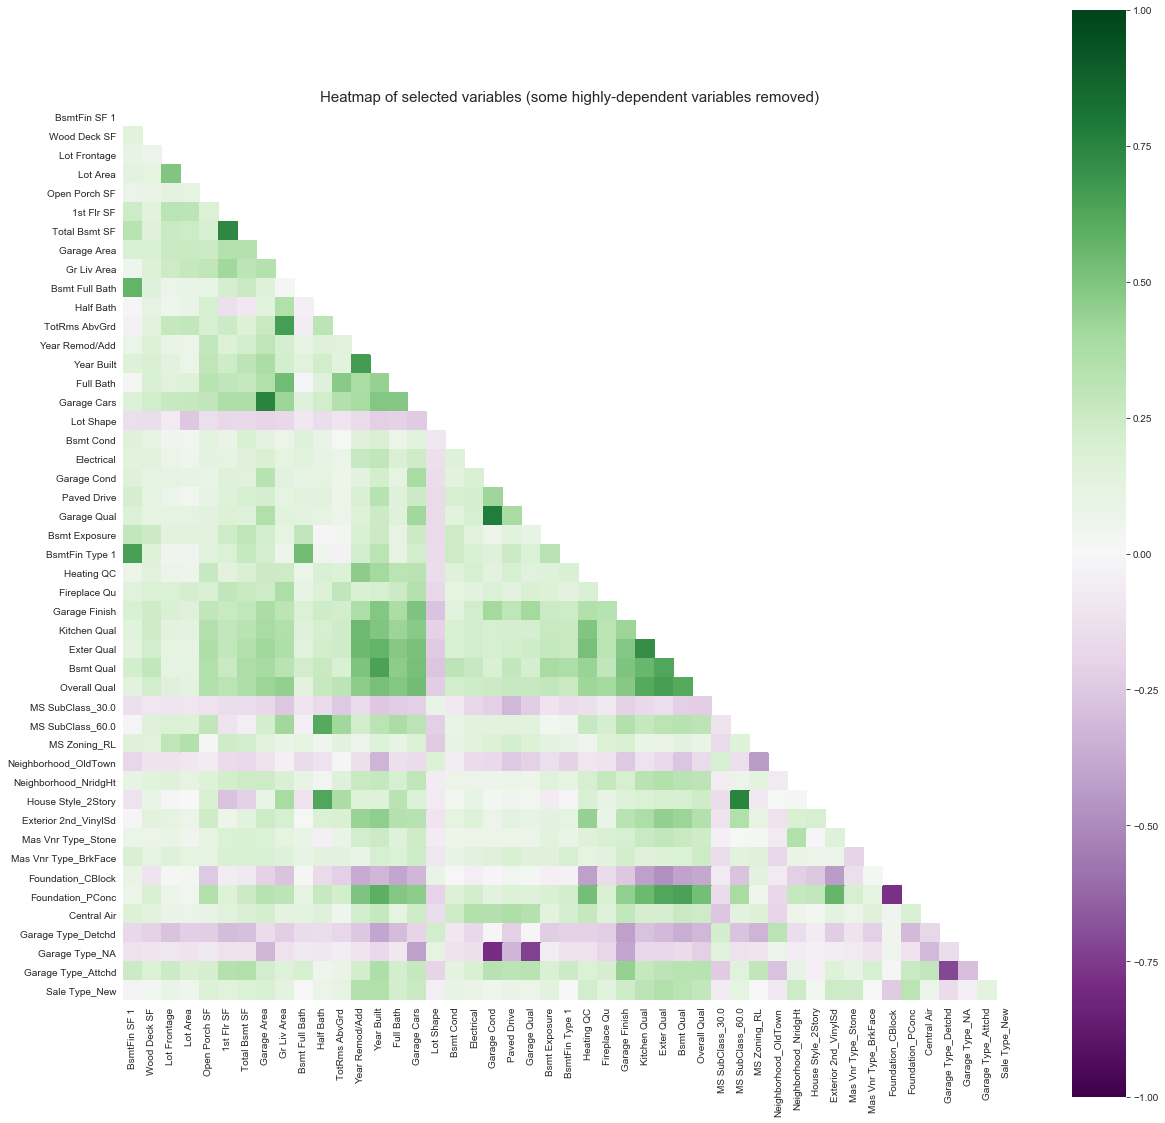

In [68]:
# Plotting the above in a heatmap to visualize the relationships.

plt.figure(figsize=(20,20))

# Generating a mask for the upper triangle.
mask = np.zeros_like(selected_var_corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(selected_var_corr_df, vmin=-1, vmax=1, mask=mask, square=True, cmap='PRGn')

plt.title("Heatmap of selected variables (some highly-dependent variables removed)", loc='center', fontsize=15)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/selected_vars_heatmap_wo_dependent_vars.png', bbox_inches='tight')

### Imputation of Missing Data

#### Missing Data Imputation in *train* Dataset

Now that I have a list of selected variables and *'Lot Frontage'* is one of them, I will impute the missing data in *'Lot Frontage'* column before proceeding to feature selection and model building and evaluation.

In [69]:
# Checking number of null values in 'Lot Frontage' column.

ce_train['Lot Frontage'].isna().sum()

327

In [70]:
# Calculating mean of 'Lot Frontage' column to impute the missing data.

lot_frontage_mean = ce_train['Lot Frontage'].mean()
lot_frontage_mean

68.68187134502924

In [71]:
# Replacing all NaN values with the mean.

ce_train['Lot Frontage'].fillna(lot_frontage_mean, inplace=True)

In [72]:
# Checking number of null values in 'Lot Frontage' column again to ensure they were correctly imputed.

ce_train['Lot Frontage'].isna().sum()

0

In [73]:
# Checking mean of 'Lot Frontage' column again to ensure missing data was correctly imputed.
# Mean should still be the same as the value calculated above.

ce_train['Lot Frontage'].mean()

68.68187134502953

In [74]:
# Final check for all remaining missing values.

null_cols_ce_train = ce_train.isna().sum()[ce_train.isna().sum()!=0]
null_cols_ce_train

# So, all missing data has been correctly imputed. 'Mas Vnr Area' and 'Garage Yr Blt' columns will not be used in feature selection and model building, and so can be disregarded.

Mas Vnr Area      21
Garage Yr Blt    113
dtype: int64

#### Missing Data Imputation in *test* Dataset

Similar to above, now that I have a list of selected variables to proceed with, I will impute the missing data in *test* dataset before proceeding to feature selection and model building and evaluation.

In [75]:
# Checking list of columns which have one or more rows with np.nan values (list filtered at the beginning of the notebook).
# This is the number of remaining missing values in the dataframe.

null_cols_ce_test

Lot Frontage     160
Mas Vnr Area       1
Electrical         1
Garage Yr Blt     45
Garage Finish      1
dtype: int64

Comparing this list against list of selected variables (*selected_var_list*), I realize that I need to impute missing values in 3 columns in *ce_test* dataframe - *'Lot Frontage'* (160 values), *'Electrical'* (1 value) & *'Garage Finish'* (1 value).

In [76]:
# Checking number of null values in 'Lot Frontage' column.

ce_test['Lot Frontage'].isna().sum()

160

In [77]:
# Replacing all NaN values with the mean calculated above from ce_train dataframe.
# I replace NaN with mean because this is a continuous variable column.

ce_test['Lot Frontage'].fillna(lot_frontage_mean, inplace=True)

In [78]:
# Checking number of null values in 'Lot Frontage' column again to ensure they were correctly imputed.

ce_test['Lot Frontage'].isna().sum()

0

In [79]:
# Checking number of null values in 'Electrical' column.

ce_test['Electrical'].isna().sum()

1

In [80]:
# Replacing the NaN value with the median calculated from ce_train dataframe.
# I replace NaN with median because this is an ordinal variable column.

ce_test['Electrical'].fillna(ce_train['Electrical'].median(), inplace=True)

In [81]:
# Checking number of null values in 'Electrical' column again to ensure they were correctly imputed.

ce_test['Electrical'].isna().sum()

0

In [82]:
# Checking number of null values in 'Garage Finish' column.

ce_test['Garage Finish'].isna().sum()

1

In [83]:
# Replacing the NaN value with the median calculated from ce_train dataframe.
# I replace NaN with median because this is an ordinal variable column.

ce_test['Garage Finish'].fillna(ce_train['Garage Finish'].median(), inplace=True)

In [84]:
# Checking number of null values in 'Garage Finish' column again to ensure they were correctly imputed.

ce_test['Garage Finish'].isna().sum()

0

In [85]:
# Final check for all remaining missing values.

null_cols_ce_test = ce_test.isna().sum()[ce_test.isna().sum()!=0]
null_cols_ce_test

# So, all missing data has been correctly imputed. 'Mas Vnr Area' and 'Garage Yr Blt' columns will not be used in feature selection and model building, and so can be disregarded.

Mas Vnr Area      1
Garage Yr Blt    45
dtype: int64

The above **EDA process was very crucial** to understand the variables in the dataset and the different correlations that exist between them. Before the EDA process, I had a dataset with >200 columns of variables. By looking at the different types of variables (continuous, discrete, ordinal & nominal) in detail, I was successfully able to **filter out a lot of the not-so-highly correlated variables (with respect to target variable *SalePrice*)**.

I was also able to **filter out some of the outliers** that would have negatively affected the machine learning models by increasing their bias, and thus resulted in incorrect predictions of housing sale prices.

The dataset is now of a more manageable size with **47 selected variables**. I can now proceed with the next stage of the process - feature selection, model building and evaluation.

## Feature Selection, Model Building & Evaluation

In this section, I will apply a few different feature selection techniques on the selected variables. I will also build regression models based on these feature selection techniques and then evaluate them using the appropriate metrics (R^2 score, mean squared error (MSE) and root mean squared error (RMSE).

Following feature selection techniques will be used, along with the machine learning models:

- **RFECV with LinearRegression** - Recursive Feature Elimination with Cross-Validation (RFECV) is an effective feature selection technique which works with an estimator which assigns weights (*.coefs_*) to the features. The technique works by first training the model on all selected features, and then eliminating the feature(s) with the least weights/coefficients (equal to value of hyperparameter *step*). The model is then trained again on the remaining features and this cycle is repeated again and again until number of features left reaaches the value of hyperparameter *min_features_to_select*. This technique will be utilised here with Linear Regression as the estimator.


- **RidgeCV followed by Ridge** - Regularization methods like Ridge and Lasso work by adding an additional "penalty" on the size of the coefficients to the loss function. So, when the loss function is minimized, this additional component is added to the residual sum of squares. In other words, model training becomes a balance between error and the size of the coefficients. This results in adding a bias to the trained model (and decrease variance), thus making it less-overfit the training dataset and more "generalizable". In case of a Ridge model, this penalty is equal to the sum of squares of all the coefficients in the model. The effect of this penalty is controlled via a tuning parameter *alpha*, and it's optimal value can be determined using a RidgeCV model. A Ridge model can then be built using the optimal value of alpha.


- **LassoCV followed by Lasso** - Similar to RidgeCV above, a Lasso model adds a penalty to the loss funtion. However, in the case of a Lasso model, this penalty is equal to the sum of absolute values of all coefficients in the model. Compared to Ridge, Lasso is more aggressive in "zeroing out" the less effective variables. Similar to RidgeCV, the optimal value of *alpha* can be determined using a LassoCV model. A Lasso model can then be built using the optimal value of alpha.


- **GridSearchCV with ElasticNet** - GridSearchCV is a technique that allows us to search for the best combination of hyperparameters for a given estimator. It works by iterating through each combination of given hyperparameters, training a model with that combination of hyperparameters, and evaluting that model using a given metric (for eg., *r2* or *neg_mean_squared_error*). The combination of hyperparameters which resulted in the best metric result is then returned. I utilize this technique here with the ElasticNet estimator, which is a combination of Ridge and Lasso explained above. The hyperparameters evaluated are *alpha* and *l1_ratio*.


- **Sequential Forward Selection with Linear Regression** - Similar to RFECV explained above, Sequential Forward Selection (SFS) works in a recusrive manner as well. SFS first trains individual models on all features one-by-one, and then compares these models using a given metric. The feature of the model with the highest evaluation is chosen. SFS then builds individual models using the selected feature and all remaining features one-by-one again, and repeats the comparison of all these models using the given metric. This process is repeated until the desired number of features are selected (equal to *k_features*). This technique will be utilised here with Linear Regression as the estimator.

### Model Preparation

In [86]:
# Defining predictor variables X and target variable y.

X = ce_train[selected_var_list]
y = ce_train['SalePrice']

act_X_test = ce_test[selected_var_list]

In [87]:
type(X)

pandas.core.frame.DataFrame

In [88]:
X.shape

(2037, 47)

In [89]:
y.shape

(2037,)

In [90]:
# Splitting our X & y into training and testing datasets.
# test_size = 0.2 is chosen because, compared to number of rows in test.csv (879), it gives us roughly twice the number of rows in X_train and roughly half the number of rows in X_test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [91]:
X_train.shape

(1629, 47)

In [92]:
y_train.shape

(1629,)

In [93]:
X_test.shape

(408, 47)

In [94]:
y_test.shape

(408,)

In [95]:
# Scaling our X_train, X_test & act_test_X datasets using X_train. Target variable y datasets do not need to be scaled.

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

act_X_test_scaled = ss.transform(act_X_test)

In [96]:
type(X_train_scaled)

numpy.ndarray

In [97]:
# Preparing dataframes from X_train_scaled, X_test_scaled & act_X_test_scaled so that it is easier to apply the masks created from our feature selection models later on.

X_train_scaled_df = pd.DataFrame(data=X_train_scaled, columns=selected_var_list)

X_test_scaled_df = pd.DataFrame(data=X_test_scaled, columns=selected_var_list)

act_X_test_scaled_df = pd.DataFrame(data=act_X_test_scaled, columns=selected_var_list)

### RFECV with LinearRegression

As explained above, Recursive Feature Elimination with Cross-Validation (RFECV) is an effective feature selection technique which works with an estimator which assigns weights (*.coefs_*) to the features. The technique works by first training the model on all selected features, and then eliminating the feature(s) with the least weights/coefficients (equal to value of hyperparameter *step*). The model is then trained again on the remaining features and this cycle is repeated again and again until number of features left reaaches the value of hyperparameter *min_features_to_select*. This technique will be utilised here with Linear Regression as the estimator.

In [98]:
# Instantiating our RFECV model with LinearRegression estimator.

lr_rfecv = RFECV(LinearRegression(),          # Estimator to be used in RFECV.
                 step=1,                      # No. of features to eliminate in each iteration (round) of elimination.
                 min_features_to_select=1,    # No. of features left until which rounds of elimination need to be repeated.
                 cv=5,                        # No. of cross validation in each round.
                 verbose=1
                )

In [99]:
# Fitting the model with X_train_scaled and y_train.

lr_rfecv.fit(X_train_scaled, y_train)

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 fe

Fitting estimator with 44 features.


RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=1)

In [100]:
# Estimates of r2 scores for subsets of features.
# For example, last value gives the estimated r2 score (mean of cv=5 r2 scores) of LinearRegression model built with all 47 selected features.
# 2nd to last value then gives estimated r2 score of LinearRegression model built with 46 top ranking features from first model built previously (step=1 lowest ranking feature is eliminated from first model).
# 3rd to last value then gives estimated r2 score of LinearRegression model built with 45 top ranking features from second model built previously (step=1 lowest ranking feature is eliminated from second model).
# And so on..

lr_rfecv.grid_scores_

array([0.64438151, 0.74306977, 0.78028867, 0.82349311, 0.83107366,
       0.84039011, 0.85215504, 0.85842986, 0.86335968, 0.8663348 ,
       0.86915159, 0.87257886, 0.87570153, 0.87643882, 0.87787438,
       0.87763913, 0.87824147, 0.87940257, 0.87931571, 0.87921618,
       0.87909242, 0.87929565, 0.87891451, 0.87905737, 0.87880302,
       0.87893423, 0.87929456, 0.87983897, 0.879749  , 0.87976869,
       0.87951847, 0.87963117, 0.8798619 , 0.87983975, 0.8804607 ,
       0.88060688, 0.88045222, 0.88062834, 0.88064133, 0.8806749 ,
       0.8807686 , 0.88074932, 0.88083734, 0.88071109, 0.88072803,
       0.88070817, 0.88070534])

In [101]:
# Optimal number of features suggested by RFECV model based on the scoring done by LinearRegression estimator (r2 score), as explained above.

lr_rfecv.n_features_

43

In [102]:
# Ranks of all 47 selected features. Features which have rank 1 will be used to build a LinearRegression model.

lr_rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 1, 1, 1,
       1, 1, 1])

In [103]:
# Printing list of the optimal features suggested by the RFECV model.

[selected_var_list[i] for i in range(len(selected_var_list)) if lr_rfecv.ranking_[i]==1]

['BsmtFin SF 1',
 'Wood Deck SF',
 'Lot Frontage',
 'Lot Area',
 'Open Porch SF',
 '1st Flr SF',
 'Total Bsmt SF',
 'Garage Area',
 'Gr Liv Area',
 'Half Bath',
 'TotRms AbvGrd',
 'Year Remod/Add',
 'Year Built',
 'Full Bath',
 'Garage Cars',
 'Bsmt Cond',
 'Electrical',
 'Garage Cond',
 'Paved Drive',
 'Garage Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Heating QC',
 'Fireplace Qu',
 'Garage Finish',
 'Kitchen Qual',
 'Exter Qual',
 'Bsmt Qual',
 'Overall Qual',
 'MS SubClass_30.0',
 'MS SubClass_60.0',
 'MS Zoning_RL',
 'Neighborhood_OldTown',
 'Neighborhood_NridgHt',
 'House Style_2Story',
 'Exterior 2nd_VinylSd',
 'Mas Vnr Type_Stone',
 'Foundation_PConc',
 'Central Air',
 'Garage Type_Detchd',
 'Garage Type_NA',
 'Garage Type_Attchd',
 'Sale Type_New']

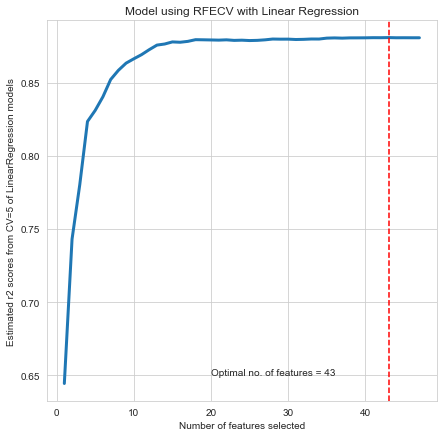

In [104]:
# Plotting the estimated r2 scores against number of features.

plt.figure(figsize=(7,7))

sns.lineplot(x=range(1, 48), y=lr_rfecv.grid_scores_, linewidth=3)

plt.axvline(lr_rfecv.n_features_, ls='--', color='r')

plt.xlabel("Number of features selected")
plt.ylabel("Estimated r2 scores from CV=5 of LinearRegression models")
    
plt.title("Model using RFECV with Linear Regression", loc='center', fontsize=12)

plt.text(x=20, y=0.65, s=f"Optimal no. of features = {lr_rfecv.n_features_}")

# Exporting plot image in PNG format.
plt.savefig('../plot_images/RFECV_LinReg_feature_selection.png', bbox_inches='tight')

The above plot shows that **as the number of selected features increases, so does the R^2 score of the model**. The R^2 score of the model is highest at the optimal number of selected features shown above.

One thing to note here would be that **even though the R^2 score is increasing with the number of selected features, the increase is happening at a decreasing rate**. So, a trade-off would have to be made at some point, because **as the number of selected features increases, so does the complexity of the model**. And a more complex model tends to overfit the training data, and may not generalise well with new unseen data (also known as **bias-variance tradeoff**).

In [105]:
# Mask of selected features from the RFECV model.

lr_rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True])

In [106]:
# Applying the mask on X_train_scaled_df, X_test_scaled_df & act_X_test_scaled_df to create new dataframes with the selected features.

X_train_scaled_lr_rfecv = X_train_scaled_df.iloc[:, lr_rfecv.support_]

X_test_scaled_lr_rfecv = X_test_scaled_df.iloc[:, lr_rfecv.support_]

act_X_test_scaled_lr_rfecv = act_X_test_scaled_df.iloc[:, lr_rfecv.support_]

In [107]:
# Checking the newly created X_train_scaled_lr_rfecv dataframe.

print(X_train_scaled_lr_rfecv.shape)
X_train_scaled_lr_rfecv.head()

(1629, 43)


BsmtFin SF 1  Wood Deck SF  Lot Frontage  Lot Area  Open Porch SF  \
0      0.513643      0.815889     -1.301025 -0.549725      -0.183726   
1     -0.185709     -0.745996     -0.001291  9.267089      -0.723877   
2      1.640377      1.206360      0.622117  0.784945       0.056342   
3     -0.992478      0.441687      1.381252  0.150301       0.641506   
4     -0.094290      0.108160     -0.238236 -0.464375       0.146367   

   1st Flr SF  Total Bsmt SF  Garage Area  Gr Liv Area  Half Bath  ...  \
0    0.547843       0.741479     0.067939    -0.265283  -0.734891  ...   
1    1.412691      -0.720500     0.477045     0.409832  -0.734891  ...   
2    2.363219       1.637148     1.183683     1.151831  -0.734891  ...   
3   -0.772187      -0.511984     0.040045     0.671099   1.267011  ...   
4    0.130146       0.371838     0.755981    -0.591345  -0.734891  ...   

   Neighborhood_NridgHt  House Style_2Story  Exterior 2nd_VinylSd  \
0              3.952524           -0.644431              1.359376   
1             -0.253003           -0.644431             -0.735632   
2             -0.253003           -0.644431             -0.735632   
3             -0.253003            1.551757              1.359376   
4             -0.253003           -0.644431              1.359376   

   Mas Vnr Type_Stone  Foundation_PConc  Central Air  Garage Type_Detchd  \
0            3.313298          1.105610     0.280728           -0.586566   
1           -0.301814         -0.904478     0.280728            1.704839   
2           -0.301814          1.105610     0.280728           -0.586566   
3           -0.301814          1.105610     0.280728           -0.586566   
4           -0.301814          1.105610     0.280728           -0.586566   

   Garage Type_NA  Garage Type_Attchd  Sale Type_New  
0       -0.247463            0.817959      -0.294490  
1       -0.247463           -1.222555      -0.294490  
2       -0.247463            0.817959       3.395699  
3       -0.247463           -1.222555      -0.294490  
4       -0.247463            0.817959      -0.294490  

[5 rows x 43 columns]

In [108]:
# Checking the newly created X_test_scaled_lr_rfecv dataframe.

print(X_test_scaled_lr_rfecv.shape)
X_test_scaled_lr_rfecv.head()

(408, 43)


BsmtFin SF 1  Wood Deck SF  Lot Frontage  Lot Area  Open Porch SF  \
0      1.302128      1.507348     -0.001291 -1.041858      -0.048688   
1     -0.135429     -0.745996     -0.946762 -0.559905      -0.723877   
2     -0.992478      0.555575     -0.592499 -0.345747      -0.723877   
3     -0.754790     -0.745996     -0.946762 -0.755662      -0.723877   
4     -0.992478     -0.404334     -0.440672  0.090008      -0.723877   

   1st Flr SF  Total Bsmt SF  Garage Area  Gr Liv Area  Half Bath  ...  \
0    0.403256       0.613526     0.351524    -0.378151   1.267011  ...   
1   -1.176496      -0.784476     1.165087    -0.576714  -0.734891  ...   
2   -0.726669      -0.386401     0.477045     0.984620   1.267011  ...   
3   -0.991746      -0.620981    -1.019911    -1.467114  -0.734891  ...   
4   -0.940872      -1.220463    -2.182144    -0.307086  -0.734891  ...   

   Neighborhood_NridgHt  House Style_2Story  Exterior 2nd_VinylSd  \
0             -0.253003           -0.644431              1.359376   
1             -0.253003           -0.644431             -0.735632   
2             -0.253003           -0.644431             -0.735632   
3             -0.253003           -0.644431              1.359376   
4             -0.253003            1.551757             -0.735632   

   Mas Vnr Type_Stone  Foundation_PConc  Central Air  Garage Type_Detchd  \
0           -0.301814          1.105610     0.280728           -0.586566   
1           -0.301814         -0.904478     0.280728            1.704839   
2           -0.301814         -0.904478     0.280728            1.704839   
3           -0.301814         -0.904478     0.280728            1.704839   
4           -0.301814          1.105610    -3.562173           -0.586566   

   Garage Type_NA  Garage Type_Attchd  Sale Type_New  
0       -0.247463            0.817959       -0.29449  
1       -0.247463           -1.222555       -0.29449  
2       -0.247463           -1.222555       -0.29449  
3       -0.247463           -1.222555       -0.29449  
4        4.041013           -1.222555       -0.29449  

[5 rows x 43 columns]

In [109]:
# Checking the newly created X_test_scaled_lr_rfecv dataframe.

print(act_X_test_scaled_lr_rfecv.shape)
act_X_test_scaled_lr_rfecv.head()

(879, 43)


BsmtFin SF 1  Wood Deck SF  Lot Frontage  Lot Area  Open Porch SF  \
0     -0.992478     -0.745996      0.014809 -0.140594       0.176376   
1     -0.992478      0.636923     -0.001291 -0.038800      -0.723877   
2      0.273669      0.067486     -0.541890  1.418022      -0.363776   
3     -0.992478     -0.745996     -0.440672 -0.262354      -0.723877   
4      0.399370     -0.745996     -0.001291 -0.070513       0.416443   

   1st Flr SF  Total Bsmt SF  Garage Area  Gr Liv Area  Half Bath  ...  \
0   -0.673118      -0.073627    -0.136614     0.913555  -0.734891  ...   
1    2.162403       2.170285     0.514236     0.995071  -0.734891  ...   
2   -1.326439      -0.940863    -0.201699     0.010615   1.267011  ...   
3   -0.512465      -0.196841     0.049343    -1.092979  -0.734891  ...   
4    0.628170       0.812564     0.207407    -0.202579   1.267011  ...   

   Neighborhood_NridgHt  House Style_2Story  Exterior 2nd_VinylSd  \
0             -0.253003            1.551757             -0.735632   
1             -0.253003           -0.644431             -0.735632   
2             -0.253003            1.551757              1.359376   
3             -0.253003           -0.644431             -0.735632   
4             -0.253003           -0.644431             -0.735632   

   Mas Vnr Type_Stone  Foundation_PConc  Central Air  Garage Type_Detchd  \
0           -0.301814         -0.904478    -3.562173            1.704839   
1           -0.301814         -0.904478     0.280728           -0.586566   
2           -0.301814          1.105610     0.280728           -0.586566   
3           -0.301814         -0.904478     0.280728            1.704839   
4           -0.301814         -0.904478     0.280728           -0.586566   

   Garage Type_NA  Garage Type_Attchd  Sale Type_New  
0       -0.247463           -1.222555      -0.294490  
1       -0.247463            0.817959      -0.294490  
2       -0.247463            0.817959       3.395699  
3       -0.247463           -1.222555      -0.294490  
4       -0.247463            0.817959      -0.294490  

[5 rows x 43 columns]

In [110]:
# Creating a new LinearRegression model with the selected features suggested by RFECV above.

lr1 = LinearRegression()
lr1.fit(X_train_scaled_lr_rfecv, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
lr1.coef_

array([10297.94436387,  2204.51360166,  2201.43239961,  6999.98641019,
         451.68238612,  1548.75231375,  8366.5074652 ,  4920.02244915,
       22740.30979874,   743.05292483,  -801.57842217,  3821.43344673,
        1913.73961588, -2953.30062996,   631.299021  , -3512.81473643,
       -1352.63946733,  2754.66229793,  1503.68623861, -1559.73821204,
        4441.93944895,   591.19795231,  1806.40067438,  3791.0026774 ,
         753.77973202,  5329.69184776,  7428.12862268,  1929.70861506,
       17169.18581098,  1768.33745378,  2770.21419682,   973.14186608,
       -2000.66667919,  4290.07926897,  -434.71372473, -2331.55632904,
        1807.86841936,  1985.8756823 ,   354.16586734,  1813.45320433,
        3030.02968248, -1476.92685471,  5817.55370406])

In [112]:
lr1.intercept_

180569.16574585636

In [113]:
# Estimated test r2 score from 5 cross validations.

cross_val_score(lr1, X_train_scaled_lr_rfecv, y_train, cv=5, scoring='r2').mean()

0.8816314913376869

In [114]:
# Spread of train r2 scores from 5 cross validations.

cross_val_score(lr1, X_train_scaled_lr_rfecv, y_train, cv=5, scoring='r2').std()

0.024312191706630477

In [115]:
# Estimated test MSE from 5 cross validations.

-cross_val_score(lr1, X_train_scaled_lr_rfecv, y_train, cv=5, scoring='neg_mean_squared_error').mean()

727490619.0836903

In [116]:
# Spread of train MSE from 5 cross validations.

(-cross_val_score(lr1, X_train_scaled_lr_rfecv, y_train, cv=5, scoring='neg_mean_squared_error')).std()

139607324.5907548

In [117]:
# Estimated test RMSE from 5 cross validations.

np.sqrt(-cross_val_score(lr1, X_train_scaled_lr_rfecv, y_train, cv=5, scoring='neg_mean_squared_error').mean())

26972.034018288097

In [118]:
# Generating test predictions from the model.

pred_1 = lr1.predict(X_test_scaled_lr_rfecv)

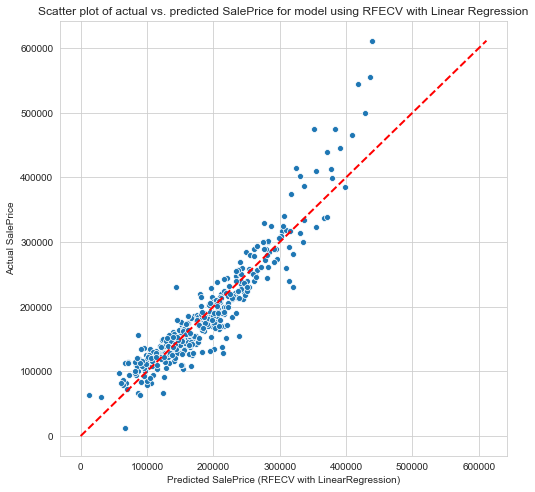

In [119]:
# Plotting the predictions against actual values.

plt.figure(figsize=(8,8))
    
sns.scatterplot(x=pred_1, y=y_test)

plt.plot([0, np.max(y_test)], [0, np.max(y_test)], linewidth=2, color='r', ls='--')

plt.xlabel("Predicted SalePrice (RFECV with LinearRegression)")
plt.ylabel("Actual SalePrice")
    
plt.title("Scatter plot of actual vs. predicted SalePrice for model using RFECV with Linear Regression", loc='center', fontsize=12)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/scatterplot_RFECV_lin_reg_predictions.png', bbox_inches='tight')

In [120]:
# Actual test r2 score.

r2_score(y_test, pred_1)

0.8767317741537005

In [121]:
# Actual test MSE.

mean_squared_error(y_test, pred_1)

833200119.0471871

In [122]:
# Actual test RMSE.

np.sqrt(mean_squared_error(y_test, pred_1))

28865.206028143763

In [123]:
data_1 = {'model_desc' : 'RFECV, LinReg',
          'est_test_r2' : cross_val_score(lr1, X_train_scaled_lr_rfecv, y_train, cv=5, scoring='r2').mean(),
          'est_test_r2_std' : cross_val_score(lr1, X_train_scaled_lr_rfecv, y_train, cv=5, scoring='r2').std(),
          'est_test_MSE' : -cross_val_score(lr1, X_train_scaled_lr_rfecv, y_train, cv=5, scoring='neg_mean_squared_error').mean(),
          'est_test_RMSE' : np.sqrt(-cross_val_score(lr1, X_train_scaled_lr_rfecv, y_train, cv=5, scoring='neg_mean_squared_error').mean()),
          'act_test_r2' : r2_score(y_test, pred_1),
          'act_test_MSE' : mean_squared_error(y_test, pred_1),
          'act_test_RMSE' : np.sqrt(mean_squared_error(y_test, pred_1)),
          'remarks' : f'RFECV selected {lr_rfecv.n_features_} out of 47 features. LinReg model built on {lr_rfecv.n_features_} selected features.'
         }

In [124]:
# Creating a dataframe to summarise all scores.

summary_df = pd.DataFrame(data=data_1, index=[1])
summary_df

model_desc  est_test_r2  est_test_r2_std  est_test_MSE  est_test_RMSE  \
1  RFECV, LinReg     0.881631         0.024312  7.274906e+08   26972.034018   

   act_test_r2  act_test_MSE  act_test_RMSE  \
1     0.876732  8.332001e+08   28865.206028   

                                             remarks  
1  RFECV selected 43 out of 47 features. LinReg m...

In [125]:
# Generating actual test predictions from the model.

act_pred_1 = lr1.predict(act_X_test_scaled_lr_rfecv)

In [126]:
# Exporting predictions generated to CSV file for sumssion to kaggle challenge.

submission_1 = pd.DataFrame(act_pred_1, columns=['SalePrice'])
submission_1 = ce_test[['Id']].sort_values(by='Id').astype(int)
submission_1['SalePrice'] = act_pred_1
submission_1.to_csv('../datasets/submission_1.csv', index=False)

### RidgeCV followed by Ridge

As explained above, regularization methods like Ridge and Lasso work by adding an additional "penalty" on the size of the coefficients to the loss function. So, when the loss function is minimized, this additional component is added to the residual sum of squares. In other words, model training becomes a balance between error and the size of the coefficients. This results in adding a bias to the trained model (and decrease variance), thus making it less-overfit the training dataset and more "generalizable". In case of a Ridge model, this penalty is equal to the sum of squares of all the coefficients in the model. The effect of this penalty is controlled via a tuning parameter *alpha*, and it's optimal value can be determined using a RidgeCV model. A Ridge model can then be built using the optimal value of alpha.

In [127]:
# Instantiating the RidgeCV model and passing in range of alpha values to determine optimal alpha from.
# We leave the default CV to be Leave One Out CV (LOOCV).
# RidgeCV, by default, gives the mean squared error as score.

r_alphas = np.logspace(0, 2, 500)
ridgecv = RidgeCV(alphas=r_alphas, store_cv_values=True)

In [128]:
# Fitting the model with X_train_scaled and y_train.

ridgecv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([  1.        ,   1.00927151,   1.01862899,   1.02807322,
         1.03760502,   1.04722519,   1.05693455,   1.06673394,
         1.07662418,   1.08660611,   1.0966806 ,   1.10684849,
         1.11711065,   1.12746796,   1.13792129,   1.14847155,
         1.15911962,   1.16986641,   1.18071285,   1.19165984,
         1.20270833,   1.21385926,   1.22511358,   1.23647224,
         1.24793621,   1.25950646,   1.271184  ,   1.2829698 ,
         1.29486487,   1.30687023,   1.3189869 ,...
        80.87524909,  81.62508514,  82.38187331,  83.14567806,
        83.91656443,  84.69459808,  85.47984529,  86.27237292,
        87.07224849,  87.87954012,  88.69431656,  89.51664721,
        90.34660212,  91.18425196,  92.02966809,  92.8829225 ,
        93.74408788,  94.61323756,  95.49044558,  96.37578664,
        97.26933615,  98.17117023,  99.08136567, 100.        ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=True)

In [129]:
# Optimal value of alpha obtained from RidgeCV.

ridgecv.alpha_

33.03985069871858

In [130]:
# Estimated test RMSEs for each individual value of alpha passed into RidgeCV.

ridge_cv_rmse = [np.sqrt(np.mean(cv_alpha)) for cv_alpha in ridgecv.cv_values_.T]
ridge_cv_rmse

[26632.179309840016,
 26632.158232269067,
 26632.136970949916,
 26632.115524390723,
 26632.093891089582,
 26632.072069534534,
 26632.05005820351,
 26632.027855564338,
 26632.00546007468,
 26631.98287018205,
 26631.96008432377,
 26631.93710092694,
 26631.913918408438,
 26631.890535174894,
 26631.86694962266,
 26631.843160137818,
 26631.819165096138,
 26631.794962863078,
 26631.770551793772,
 26631.745930233006,
 26631.721096515234,
 26631.696048964528,
 26631.670785894603,
 26631.6453056088,
 26631.619606400083,
 26631.59368655102,
 26631.567544333808,
 26631.54117801024,
 26631.514585831752,
 26631.48776603936,
 26631.460716863745,
 26631.433436525163,
 26631.40592323354,
 26631.378175188453,
 26631.35019057909,
 26631.321967584357,
 26631.293504372803,
 26631.2647991027,
 26631.235849922043,
 26631.20665496853,
 26631.17721236966,
 26631.147520242706,
 26631.11757669474,
 26631.087379822704,
 26631.056927713395,
 26631.026218443523,
 26630.99525007975,
 26630.96402067873,
 26630.93252

In [131]:
# Initiating a LinearRegression model to act as baseline for comparison.

lr2 = LinearRegression()

lr_cv_mean_rmse = np.sqrt(-cross_val_score(lr2, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean())
lr_cv_mean_rmse

27075.50174465897

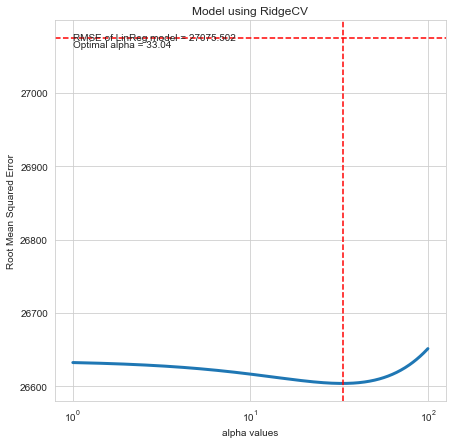

In [132]:
# Plotting obtained RMSE values against values of alpha.

plt.figure(figsize=(7,7))

plt.xscale('log')

sns.lineplot(x=ridgecv.alphas, y=ridge_cv_rmse, linewidth=3)

plt.axvline(ridgecv.alpha_, ls='--', color='r')
plt.axhline(lr_cv_mean_rmse, ls='--', color='r')

plt.xlabel("alpha values")
plt.ylabel("Root Mean Squared Error")

plt.title("Model using RidgeCV", loc='center', fontsize=12)

plt.text(x=1, y=lr_cv_mean_rmse-13, s=f"Optimal alpha = {round(ridgecv.alpha_, 3)}")
plt.text(x=1, y=lr_cv_mean_rmse-3, s=f"RMSE of LinReg model = {round(lr_cv_mean_rmse, 3)}")

# Exporting plot image in PNG format.
plt.savefig('../plot_images/RidgeCV_optimal_alpha.png', bbox_inches='tight');

The above plot shows that **as the alpha value increases, there comes a point where the error between the predictions and the actual *SalePrice* values is at a minimum**. This value of alpha is the optimal value, and can be used to build a Ridge model using the features.

One thing to note here would be that **even though there is a difference between the RMSE of RidgeCV (blue curve) vs. Linear Regression (horizontal red dashed line), the difference is not very significant**. This could mean that a Ridge model may not be an effective feature selection technique for this dataset.

In [133]:
# Creating a new Ridge model with optimal alpha value suggested by RidgeCV above.

ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=33.03985069871858, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [134]:
ridge.coef_

array([ 9987.58672458,  2301.92515164,  2253.74450043,  6886.4616581 ,
         552.49216147,  3721.70864581,  7757.58364717,  5054.73366566,
       19408.76015225,  -138.5552644 ,  1381.56466719,   130.97023187,
        3579.17415352,  1171.88931983, -2131.99251066,   618.79329242,
          99.52544328, -3289.59257835, -1258.96773909,  1822.3356515 ,
        1536.70846844, -1143.57104971,  4423.84117567,   941.06672628,
        1889.4045874 ,  4027.95065929,   763.00547673,  5504.30901778,
        7514.80596602,  2399.85457458, 16384.69964234,  1401.27498779,
        3061.51949789,   838.27716829, -1927.42374746,  4250.83741655,
         321.41991479, -2247.16498041,  1817.99064949,    65.77351658,
        -466.8740964 ,  1701.85914337,   427.65369631,  1528.72595636,
        2332.0356853 , -1680.59630101,  5646.7462766 ])

In [135]:
ridge.intercept_

180569.16574585636

In [136]:
# Estimated test r2 score from 5 cross validations.

cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='r2').mean()

0.8815559656407045

In [137]:
# Spread of train r2 scores from 5 cross validations.

cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='r2').std()

0.024087217155845275

In [138]:
# Estimated test MSE from 5 cross validations.

-cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean()

727902042.8592163

In [139]:
# Spread of train MSE from 5 cross validations.

(-cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')).std()

137995106.9153334

In [140]:
# Estimated test RMSE from 5 cross validations.

np.sqrt(-cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean())

26979.65979880429

In [141]:
# Generating test predictions from the model

pred_2 = ridge.predict(X_test_scaled)

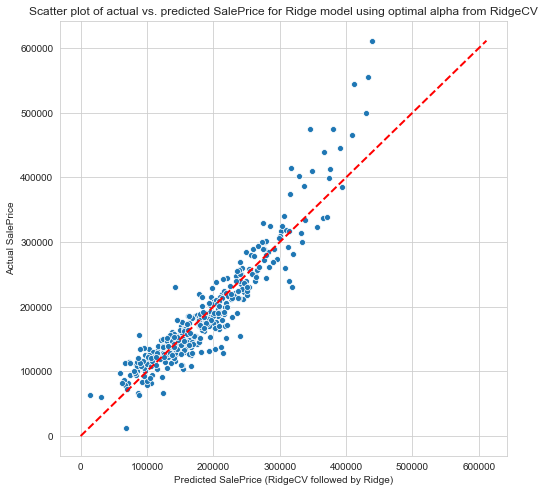

In [142]:
# Plotting the predictions against actual values.

plt.figure(figsize=(8,8))
    
sns.scatterplot(x=pred_2, y=y_test)

plt.plot([0, np.max(y_test)], [0, np.max(y_test)], linewidth=2, color='r', ls='--')

plt.xlabel("Predicted SalePrice (RidgeCV followed by Ridge)")
plt.ylabel("Actual SalePrice")
    
plt.title("Scatter plot of actual vs. predicted SalePrice for Ridge model using optimal alpha from RidgeCV", loc='center', fontsize=12)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/scatterplot_ridgecv_ridge_predictions.png', bbox_inches='tight')

In [143]:
# Actual test r2 score.

r2_score(y_test, pred_2)

0.8744982609883829

In [144]:
# Actual test MSE.

mean_squared_error(y_test, pred_2)

848296981.376953

In [145]:
# Actual test RMSE.

np.sqrt(mean_squared_error(y_test, pred_2))

29125.538301925906

In [146]:
data_2 = {'model_desc' : 'RidgeCV, Ridge',
          'est_test_r2' : cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='r2').mean(),
          'est_test_r2_std' : cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='r2').std(),
          'est_test_MSE' : -cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean(),
          'est_test_RMSE' : np.sqrt(-cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean()),
          'act_test_r2' : r2_score(y_test, pred_2),
          'act_test_MSE' : mean_squared_error(y_test, pred_2),
          'act_test_RMSE' : np.sqrt(mean_squared_error(y_test, pred_2)),
          'remarks' : f'RidgeCV suggested optimal alpha = {ridgecv.alpha_}.'
         }

In [147]:
summary_df = summary_df.append(pd.DataFrame(data=data_2, index=[2]))
summary_df

model_desc  est_test_r2  est_test_r2_std  est_test_MSE  est_test_RMSE  \
1   RFECV, LinReg     0.881631         0.024312  7.274906e+08   26972.034018   
2  RidgeCV, Ridge     0.881556         0.024087  7.279020e+08   26979.659799   

   act_test_r2  act_test_MSE  act_test_RMSE  \
1     0.876732  8.332001e+08   28865.206028   
2     0.874498  8.482970e+08   29125.538302   

                                             remarks  
1  RFECV selected 43 out of 47 features. LinReg m...  
2  RidgeCV suggested optimal alpha = 33.039850698...

In [148]:
# Generating actual test predictions from the model.

act_pred_2 = ridge.predict(act_X_test_scaled)

In [149]:
# Exporting predictions generated to CSV file for sumssion to kaggle challenge.

submission_2 = pd.DataFrame(act_pred_2, columns=['SalePrice'])
submission_2 = ce_test[['Id']].sort_values(by='Id').astype(int)
submission_2['SalePrice'] = act_pred_2
submission_2.to_csv('../datasets/submission_2.csv', index=False)

### LassoCV followed by Lasso

Similar to RidgeCV above, a Lasso model adds a penalty to the loss funtion. However, in the case of a Lasso model, this penalty is equal to the sum of absolute values of all coefficients in the model. Compared to Ridge, Lasso is more aggressive in "zeroing out" the less effective variables. Similar to RidgeCV, the optimal value of *alpha* can be determined using a LassoCV model. A Lasso model can then be built using the optimal value of alpha.

In [150]:
# Instantiating the LassoCV model and passing in range of alpha values to determine optimal alpha from.
# We leave the default cv=5.
# LassoCV, by default, gives the r2 error as score.

l_alphas = np.arange(1, 500, 1)
lassocv = LassoCV(alphas=l_alphas)

In [151]:
# Fitting the model with X_train_scaled and y_train.

lassocv.fit(X_train_scaled, y_train)

LassoCV(alphas=array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109,...
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494,
       495, 496, 497, 498, 499]),
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=Fal

In [152]:
# Optimal value of alpha obtained from LassoCV.

lassocv.alpha_

307

In [153]:
# Estimated test RMSEs for each individual value of alpha passed into LassoCV.

lasso_cv_rmse = [np.sqrt(np.mean(cv_alpha)) for cv_alpha in lassocv.mse_path_]
lasso_cv_rmse

[26938.582765073574,
 26938.305016414837,
 26937.920169533398,
 26937.574185653204,
 26937.248515385672,
 26936.923114713416,
 26936.587724809706,
 26936.24033091662,
 26935.883580877467,
 26935.522004301816,
 26935.160085504296,
 26934.801234391267,
 26934.447474701796,
 26934.09957445707,
 26933.757816598754,
 26933.41822467364,
 26933.091943366526,
 26932.771961077502,
 26932.45417205572,
 26932.13718898329,
 26931.820525505904,
 26931.504065803052,
 26931.187634161604,
 26930.89346066159,
 26930.62806318852,
 26930.369399057025,
 26930.112657030433,
 26929.856863311288,
 26929.601912239374,
 26929.347937849114,
 26929.09509446445,
 26928.843504759432,
 26928.593257069315,
 26928.34441003938,
 26928.096997811783,
 26927.851035575823,
 26927.606525207444,
 26927.363460433386,
 26927.121831062672,
 26926.881626073482,
 26926.642835567025,
 26926.405451752707,
 26926.16946920527,
 26925.934884649185,
 26925.701696496508,
 26925.469904312184,
 26925.2395083227,
 26925.010509029667,
 269

In [154]:
# Initiating a LinearRegression model to act as baseline for comparison.

lr3 = LinearRegression()

lr_cv_mean_rmse = np.sqrt(-cross_val_score(lr3, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean())
lr_cv_mean_rmse

27075.50174465897

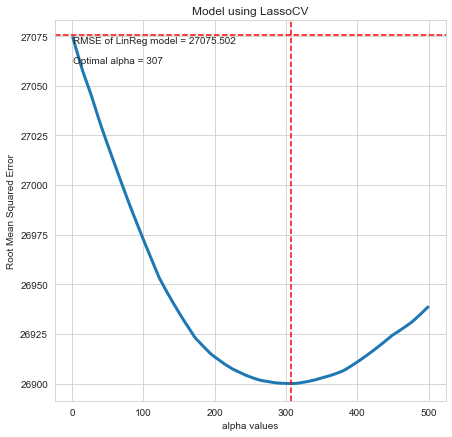

In [155]:
# Plotting obtained RMSE values against values of alpha.

plt.figure(figsize=(7,7))

sns.lineplot(x=lassocv.alphas_, y=lasso_cv_rmse, linewidth=3)

plt.axvline(lassocv.alpha_, ls='--', color='r')
plt.axhline(lr_cv_mean_rmse, ls='--', color='r')

plt.xlabel("alpha values")
plt.ylabel("Root Mean Squared Error")

plt.title("Model using LassoCV", loc='center', fontsize=12)

plt.text(x=1, y=lr_cv_mean_rmse-14, s=f"Optimal alpha = {round(lassocv.alpha_, 3)}")
plt.text(x=1, y=lr_cv_mean_rmse-4, s=f"RMSE of LinReg model = {round(lr_cv_mean_rmse, 3)}")

# Exporting plot image in PNG format.
plt.savefig('../plot_images/LassoCV_optimal_alpha.png', bbox_inches='tight');

The above plot shows that **as the alpha value increases, there comes a point where the error between the predictions and the actual *SalePrice* values is at a minimum**. This value of alpha is the optimal value, and can be used to build a Lasso model using the features.

One thing to note here would be that **even though there is a difference between the RMSE of LassoCV (blue curve) vs. Linear Regression (horizontal red dashed line), the difference is not very significant**. This could mean that a Lasso model may not be an effective feature selection technique for this dataset.

However, this **difference in RMSE of LassoCV vs. Linear Regression is bigger than the difference in RMSE of RidgeCV vs. Linear Regression**. So, it can be said that a Lasso model is more effective in feature selection on this dataset than a Ridge model.

In [156]:
# Creating a new Lasso model with optimal alpha value suggested by LassoCV above.

lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=307, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [157]:
lasso.coef_

array([10625.08765879,  2039.87634834,  2027.61347661,  6739.90607345,
         275.0885521 ,  2345.9815003 ,  7862.72475114,  5204.41356513,
       20863.28102665,     0.        ,   987.95689302,    -0.        ,
        3252.62288916,  1294.12639131, -1710.31877994,     0.        ,
          -0.        , -2553.46230163,  -757.97005976,    -0.        ,
        1072.90932654,    -0.        ,  4336.71005223,   169.60377554,
        1719.12175204,  3793.95298158,    34.20107975,  5455.28679737,
        7711.88062385,  1590.54592448, 17200.42661284,  1283.81039862,
        2315.42961306,   573.51379248, -1920.01573257,  4323.66603637,
          -0.        , -1411.35651613,  1586.80736449,     0.        ,
          -0.        ,  1751.94173884,     0.        ,     0.        ,
         216.82737072, -1894.2979225 ,  5561.70036521])

In [158]:
lasso.intercept_

180569.16574585636

In [159]:
# Estimated test r2 score from 5 cross validations.

cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='r2').mean()

0.8822513911747855

In [160]:
# Spread of train r2 scores from 5 cross validations.

cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='r2').std()

0.0238852776491899

In [161]:
# Estimated test MSE from 5 cross validations.

-cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean()

723625100.5816325

In [162]:
# Spread of train MSE from 5 cross validations.

(-cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')).std()

136687850.26499656

In [163]:
# Estimated test RMSE from 5 cross validations.

np.sqrt(-cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean())

26900.280678491676

In [164]:
# Generating test predictions from the model

pred_3 = lasso.predict(X_test_scaled)

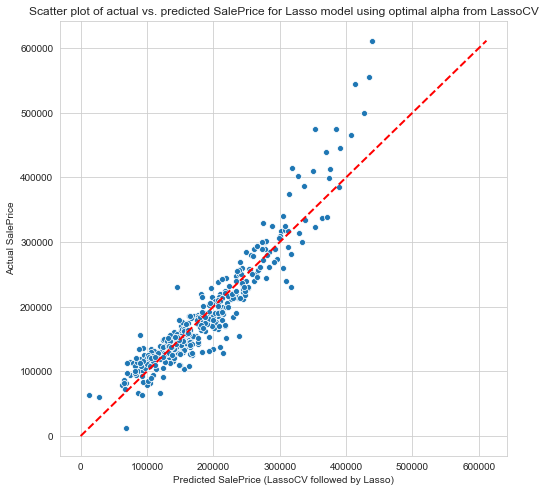

In [165]:
# Plotting the predictions against actual values.

plt.figure(figsize=(8,8))
    
sns.scatterplot(x=pred_3, y=y_test)

plt.plot([0, np.max(y_test)], [0, np.max(y_test)], linewidth=2, color='r', ls='--')

plt.xlabel("Predicted SalePrice (LassoCV followed by Lasso)")
plt.ylabel("Actual SalePrice")
    
plt.title("Scatter plot of actual vs. predicted SalePrice for Lasso model using optimal alpha from LassoCV", loc='center', fontsize=12)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/scatterplot_lassocv_lasso_predictions.png', bbox_inches='tight')

In [166]:
# Actual test r2 score.

r2_score(y_test, pred_3)

0.8778841339820773

In [167]:
# Actual test MSE.

mean_squared_error(y_test, pred_3)

825411036.8275245

In [168]:
# Actual test RMSE.

np.sqrt(mean_squared_error(y_test, pred_3))

28729.96757442522

In [169]:
data_3 = {'model_desc' : 'LassoCV, Lasso',
          'est_test_r2' : cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='r2').mean(),
          'est_test_r2_std' : cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='r2').std(),
          'est_test_MSE' : -cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean(),
          'est_test_RMSE' : np.sqrt(-cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean()),
          'act_test_r2' : r2_score(y_test, pred_3),
          'act_test_MSE' : mean_squared_error(y_test, pred_3),
          'act_test_RMSE' : np.sqrt(mean_squared_error(y_test, pred_3)),
          'remarks' : f'LassoCV suggested optimal alpha = {lassocv.alpha_}.'
         }

In [170]:
summary_df = summary_df.append(pd.DataFrame(data=data_3, index=[3]))
summary_df

model_desc  est_test_r2  est_test_r2_std  est_test_MSE  est_test_RMSE  \
1   RFECV, LinReg     0.881631         0.024312  7.274906e+08   26972.034018   
2  RidgeCV, Ridge     0.881556         0.024087  7.279020e+08   26979.659799   
3  LassoCV, Lasso     0.882251         0.023885  7.236251e+08   26900.280678   

   act_test_r2  act_test_MSE  act_test_RMSE  \
1     0.876732  8.332001e+08   28865.206028   
2     0.874498  8.482970e+08   29125.538302   
3     0.877884  8.254110e+08   28729.967574   

                                             remarks  
1  RFECV selected 43 out of 47 features. LinReg m...  
2  RidgeCV suggested optimal alpha = 33.039850698...  
3             LassoCV suggested optimal alpha = 307.

In [171]:
# Generating actual test predictions from the model.

act_pred_3 = lasso.predict(act_X_test_scaled)

In [172]:
# Exporting predictions generated to CSV file for sumssion to kaggle challenge.

submission_3 = pd.DataFrame(act_pred_3, columns=['SalePrice'])
submission_3 = ce_test[['Id']].sort_values(by='Id').astype(int)
submission_3['SalePrice'] = act_pred_3
submission_3.to_csv('../datasets/submission_3.csv', index=False)

### GridSearchCV with ElasticNet

GridSearchCV is a technique that allows us to search for the best combination of hyperparameters for a given estimator. It works by iterating through each combination of given hyperparameters, training a model with that combination of hyperparameters, and evaluting that model using a given metric (for eg., *r2* or *neg_mean_squared_error*). The combination of hyperparameters which resulted in the best metric result is then returned. I utilize this technique here with the ElasticNet estimator, which is a combination of Ridge and Lasso explained above. The hyperparameters evaluated are *alpha* and *l1_ratio*.

In [173]:
# Creating a dictionary of hyperparameters of ElasticNet to be passed into GridSearchCV.

eln_params = {'alpha' : np.arange(1, 502, 25),        # From above RidgeCV & LassoCV models, optimal alpha values were between 1-500.
              'l1_ratio' : np.arange(0, 1.01, 0.05),  # l1_ratio values can be from 0-1.
              'max_iter' : [1_000],                   # Unsuccessful attempt to resolve ConvergenceWarning by increasing max_iter (default=1000) as suggested on this page: https://hiphive.materialsmodeling.org/advanced_topics/feature_selection.html
              'tol' : [0.0001]                        # Unsuccessful attempt to resolve ConvergenceWarning by increasing tol (default=0.0001) as suggested on this page: https://stackoverflow.com/questions/20681864/lasso-on-sklearn-does-not-converge
             }

In [174]:
# Instantiating the GridSearchCV model with ElasticNet as estimator.

eln_gridsearchcv = GridSearchCV(ElasticNet(),   # Estimator to be used in GridSearchCV.
                                eln_params,     # Hyperparameters of ElasticNet to be passed into GridSearch.
                                cv=5,           # No. of cross-validation folds to run for each unique set of hyperparameters.
                                scoring='neg_mean_squared_error',
                                verbose=1
                               )

In [175]:
%%time
# Fitting the model with X_train_scaled and y_train.

eln_gridsearchcv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 441 candidates, totalling 2205 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 841871570550.1337, tolerance: 812170444.3807958
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 838721629877.3202, tolerance: 787778226.2068194
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 889586409516.2013, tolerance: 806095499.6282558
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3797185289867.3037, tolerance: 806095499.6282558
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3766092141664.0176, tolerance: 801453034.4206866
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3809426891860.9297, tolerance: 810783235.7374516
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3881629897953.98, tolerance: 801453034.4206866
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3926506427610.436, tolerance: 810783235.7374516
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3943485967164.1187, tolerance: 812170444.3807958
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3967761885297.1406, tolerance: 810783235.7374516
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3979556928657.0664, tolerance: 812170444.3807958
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3859673674104.62, tolerance: 787778226.2068194
  positive)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

Wall time: 21.6 s


[Parallel(n_jobs=1)]: Done 2205 out of 2205 | elapsed:   21.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([  1,  26,  51,  76, 101, 126, 151, 176, 201, 226, 251, 276, 301,
       326, 351, 376, 401, 426, 451, 476, 501]),
                         'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
                         'max_iter': [1000], 'tol': [0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [176]:
# Best values of alpha and l1_ratio obtained from GridSearchCV.

eln_gridsearchcv.best_params_

{'alpha': 301, 'l1_ratio': 1.0, 'max_iter': 1000, 'tol': 0.0001}

Best parameters *l1_ratio* of 1.0 suggests that **a complete lasso model is best suited for training a model on this dataset**.

In [177]:
# Best MSE obtained with the above best parameters.

-eln_gridsearchcv.best_score_

723629626.1278434

In [178]:
# Best RMSE obtained with the above best parameters.

np.sqrt(-eln_gridsearchcv.best_score_)

26900.36479544178

In [179]:
eln_gridsearchcv_df = pd.DataFrame(eln_gridsearchcv.cv_results_)
eln_gridsearchcv_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.156104      0.031669           0.0012        0.000399           1   
1       0.006995      0.000632           0.0004        0.000490           1   
2       0.007396      0.001019           0.0004        0.000490           1   
3       0.007196      0.001938           0.0006        0.000490           1   
4       0.008794      0.001166           0.0010        0.000002           1   

  param_l1_ratio param_max_iter param_tol  \
0              0           1000    0.0001   
1           0.05           1000    0.0001   
2            0.1           1000    0.0001   
3           0.15           1000    0.0001   
4            0.2           1000    0.0001   

                                              params  split0_test_score  \
0  {'alpha': 1, 'l1_ratio': 0.0, 'max_iter': 1000...      -9.275515e+08   
1  {'alpha': 1, 'l1_ratio': 0.05, 'max_iter': 100...      -9.232347e+08   
2  {'alpha': 1, 'l1_ratio': 0.1, 'max_iter': 1000...      -9.190749e+08   
3  {'alpha': 1, 'l1_ratio': 0.15000000000000002, ...      -9.150865e+08   
4  {'alpha': 1, 'l1_ratio': 0.2, 'max_iter': 1000...      -9.112859e+08   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0      -9.767310e+08      -6.270162e+08      -9.537385e+08      -7.979352e+08   
1      -9.644927e+08      -6.205697e+08      -9.459329e+08      -7.897483e+08   
2      -9.521310e+08      -6.141900e+08      -9.381567e+08      -7.815452e+08   
3      -9.396394e+08      -6.078811e+08      -9.304131e+08      -7.733271e+08   
4      -9.270109e+08      -6.016474e+08      -9.227054e+08      -7.650900e+08   

   mean_test_score  std_test_score  rank_test_score  
0    -8.565945e+08    1.304237e+08               41  
1    -8.487957e+08    1.295657e+08               40  
2    -8.410195e+08    1.287345e+08               39  
3    -8.332694e+08    1.279363e+08               38  
4    -8.255479e+08    1.271785e+08               37

In [180]:
# Filtering above dataframe to plot relevant columns.

eln_gridsearchcv_df = eln_gridsearchcv_df[['param_alpha', 'param_l1_ratio', 'params', 'mean_test_score']]
eln_gridsearchcv_df.head()

param_alpha param_l1_ratio  \
0           1              0   
1           1           0.05   
2           1            0.1   
3           1           0.15   
4           1            0.2   

                                              params  mean_test_score  
0  {'alpha': 1, 'l1_ratio': 0.0, 'max_iter': 1000...    -8.565945e+08  
1  {'alpha': 1, 'l1_ratio': 0.05, 'max_iter': 100...    -8.487957e+08  
2  {'alpha': 1, 'l1_ratio': 0.1, 'max_iter': 1000...    -8.410195e+08  
3  {'alpha': 1, 'l1_ratio': 0.15000000000000002, ...    -8.332694e+08  
4  {'alpha': 1, 'l1_ratio': 0.2, 'max_iter': 1000...    -8.255479e+08

In [181]:
plot_filter = eln_gridsearchcv_df[eln_gridsearchcv_df['param_l1_ratio'].isin([0, 0.5, 0.9, 1])]
plot_filter.reset_index(inplace=True)
plot_filter['rmse'] = plot_filter['mean_test_score'].map(lambda x : np.sqrt(-x))
plot_filter.head(10)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


index param_alpha param_l1_ratio  \
0      0           1              0   
1     10           1            0.5   
2     18           1            0.9   
3     20           1              1   
4     21          26              0   
5     31          26            0.5   
6     39          26            0.9   
7     41          26              1   
8     42          51              0   
9     52          51            0.5   

                                              params  mean_test_score  \
0  {'alpha': 1, 'l1_ratio': 0.0, 'max_iter': 1000...    -8.565945e+08   
1  {'alpha': 1, 'l1_ratio': 0.5, 'max_iter': 1000...    -7.801383e+08   
2  {'alpha': 1, 'l1_ratio': 0.9, 'max_iter': 1000...    -7.291026e+08   
3  {'alpha': 1, 'l1_ratio': 1.0, 'max_iter': 1000...    -7.330158e+08   
4  {'alpha': 26, 'l1_ratio': 0.0, 'max_iter': 100...    -3.510869e+09   
5  {'alpha': 26, 'l1_ratio': 0.5, 'max_iter': 100...    -2.500390e+09   
6  {'alpha': 26, 'l1_ratio': 0.9, 'max_iter': 100...    -1.111417e+09   
7  {'alpha': 26, 'l1_ratio': 1.0, 'max_iter': 100...    -7.314972e+08   
8  {'alpha': 51, 'l1_ratio': 0.0, 'max_iter': 100...    -4.449884e+09   
9  {'alpha': 51, 'l1_ratio': 0.5, 'max_iter': 100...    -3.483308e+09   

           rmse  
0  29267.635281  
1  27930.956827  
2  27001.900289  
3  27074.264679  
4  59252.588267  
5  50003.895079  
6  33337.922788  
7  27046.204218  
8  66707.453082  
9  59019.553254

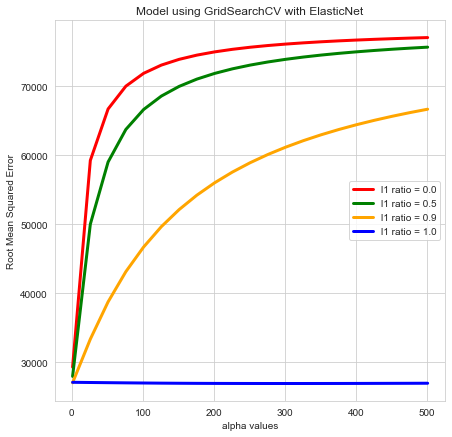

In [182]:
# Plotting obtained mean_test_score values against values of alpha and by l1_ratio.

plt.figure(figsize=(7,7))

sns.lineplot(data=plot_filter, x='param_alpha', y='rmse', hue='param_l1_ratio', linewidth=3, palette=['red', 'green', 'orange', 'blue'])

plt.xlabel("alpha values")
plt.ylabel("Root Mean Squared Error")
plt.legend(['l1 ratio = 0.0', 'l1 ratio = 0.5', 'l1 ratio = 0.9', 'l1 ratio = 1.0'])

plt.title("Model using GridSearchCV with ElasticNet", loc='center', fontsize=12)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/GridSearchCV_ElasticNet_alpha_l1_ratio.png', bbox_inches='tight');

The above plot shows that **for values of *l1_ratio* < 1.0, as the alpha value increases, the error between the predictions and the actual *SalePrice* values also increases**. This means that the model does not converge, and results in what is known as **Convergence Warning**, which we encountered while fitting the GridSearchCV model above.

The behaviour of the blue line with value of *l1_ratio* = 1.0 is explained in the plot below.

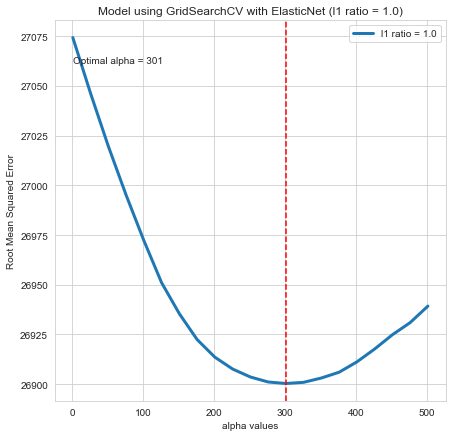

In [183]:
# Plotting obtained mean_test_score values against values of alpha and by l1_ratio.

plt.figure(figsize=(7,7))

sns.lineplot(data=plot_filter[plot_filter['param_l1_ratio']==1], x='param_alpha', y='rmse', linewidth=3)

plt.axvline(eln_gridsearchcv.best_params_['alpha'], ls='--', color='r')
#plt.axhline(lr_cv_mean_rmse, ls='--', color='r')

plt.xlabel("alpha values")
plt.ylabel("Root Mean Squared Error")
plt.legend(['l1 ratio = 1.0'])

plt.title("Model using GridSearchCV with ElasticNet (l1 ratio = 1.0)", loc='center', fontsize=12)

plt.text(x=1, y=lr_cv_mean_rmse-14, s=f"Optimal alpha = {round(eln_gridsearchcv.best_params_['alpha'], 3)}")

# Exporting plot image in PNG format.
plt.savefig('../plot_images/GridSearchCV_ElasticNet_l1_ratio_1.png', bbox_inches='tight');

The above plot shows that **for values of *l1_ratio* = 1.0, as the alpha value increases, there comes a point where the error between the predictions and the actual *SalePrice* values is at a minimum**. This value of alpha is the optimal value, and can be used to build a Lasso model using the features.

However, as also explained above, the best parameter *alpha* value obtained from GridSearchCV using ElasticNet estimator is 1.0. This means that **a complete lasso model is best for minimising RMSE for this dataset**. And, as expected, the above plot of RMSE vs. alpha values with *l1 ratio = 1.0* is similar to the plot from the Lasso model above.

In [184]:
data_4 = {'model_desc' : 'GridSearchCV, ElasticNet',
          'est_test_r2' : cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='r2').mean(),
          'est_test_r2_std' : cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='r2').std(),
          'est_test_MSE' : -cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean(),
          'est_test_RMSE' : np.sqrt(-cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean()),
          'act_test_r2' : r2_score(y_test, pred_3),
          'act_test_MSE' : mean_squared_error(y_test, pred_3),
          'act_test_RMSE' : np.sqrt(mean_squared_error(y_test, pred_3)),
          'remarks' : f"GridSearchCV suggested best l1 ratio = {eln_gridsearchcv.best_params_['l1_ratio']}. So, model scores same as Lasso model above."
         }

In [185]:
summary_df = summary_df.append(pd.DataFrame(data=data_4, index=[4]))
summary_df

model_desc  est_test_r2  est_test_r2_std  est_test_MSE  \
1             RFECV, LinReg     0.881631         0.024312  7.274906e+08   
2            RidgeCV, Ridge     0.881556         0.024087  7.279020e+08   
3            LassoCV, Lasso     0.882251         0.023885  7.236251e+08   
4  GridSearchCV, ElasticNet     0.882251         0.023885  7.236251e+08   

   est_test_RMSE  act_test_r2  act_test_MSE  act_test_RMSE  \
1   26972.034018     0.876732  8.332001e+08   28865.206028   
2   26979.659799     0.874498  8.482970e+08   29125.538302   
3   26900.280678     0.877884  8.254110e+08   28729.967574   
4   26900.280678     0.877884  8.254110e+08   28729.967574   

                                             remarks  
1  RFECV selected 43 out of 47 features. LinReg m...  
2  RidgeCV suggested optimal alpha = 33.039850698...  
3             LassoCV suggested optimal alpha = 307.  
4  GridSearchCV suggested best l1 ratio = 1.0. So...

### Sequential Forward Selection with Linear Regression

Similar to RFECV explained above, Sequential Forward Selection (SFS) works in a recusrive manner as well. SFS first trains individual models on all features one-by-one, and then compares these models using a given metric. The feature of the model with the highest evaluation is chosen. SFS then builds individual models using the selected feature and all remaining features one-by-one again, and repeats the comparison of all these models using the given metric. This process is repeated until the desired number of features are selected (equal to *k_features*). This technique will be utilised here with Linear Regression as the estimator.

The documentation for SequentialFeatureSelector can be found [here](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/). The following code was written with references from this [page](https://www.kdnuggets.com/2018/06/step-forward-feature-selection-python.html).

In [186]:
# Instantiating the SequentialFeatureSelector model with LinearRegression as estimator.

lr_sfs = SequentialFeatureSelector(LinearRegression(),              # Estimator to be used in SequentialFeatureSelector.
                                   k_features=47,                   # No. of features to select. I will select all features first to see the optimum no. of features which minimise RMSE.
                                   forward=True,                    # Step forward feature selection
                                   cv=5,                            # No. of cross-validation folds to run for each unique set of hyperparameters.
                                   scoring='neg_mean_squared_error',
                                   verbose=0
                                  )

In [187]:
# Fitting the model with X_train_scaled and y_train.

lr_sfs.fit(X_train_scaled, y_train, custom_feature_names=selected_var_list)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=47, n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring='neg_mean_squared_error', verbose=0)

In [188]:
# Looking at the features selected at each iteration of lr_sfs.

lr_sfs.subsets_

{1: {'feature_idx': (30,),
  'cv_scores': array([-2.01263820e+09, -2.53248990e+09, -1.99059523e+09, -2.31558309e+09,
         -2.12532519e+09]),
  'avg_score': -2195326324.3021874,
  'feature_names': ('Overall Qual',)},
 2: {'feature_idx': (8, 30),
  'cv_scores': array([-1.57401538e+09, -1.80941358e+09, -1.38681453e+09, -1.71297900e+09,
         -1.44453751e+09]),
  'avg_score': -1585552001.4351645,
  'feature_names': ('Gr Liv Area', 'Overall Qual')},
 3: {'feature_idx': (0, 8, 30),
  'cv_scores': array([-1.21352754e+09, -1.39073233e+09, -1.03801875e+09, -1.39673754e+09,
         -1.19696319e+09]),
  'avg_score': -1247195871.068163,
  'feature_names': ('BsmtFin SF 1', 'Gr Liv Area', 'Overall Qual')},
 4: {'feature_idx': (0, 8, 28, 30),
  'cv_scores': array([-1.02404242e+09, -1.15299029e+09, -9.28910212e+08, -1.15146135e+09,
         -1.08140841e+09]),
  'avg_score': -1067762537.3148987,
  'feature_names': ('BsmtFin SF 1',
   'Gr Liv Area',
   'Exter Qual',
   'Overall Qual')},
 5: {'fe

In [189]:
# Mean score (neg_mean_squared_error) of LinearRegression model using all 47 features.

lr_sfs.k_score_

-733082794.7250309

In [190]:
lr_sfs_df = pd.DataFrame.from_dict(lr_sfs.get_metric_dict()).T
lr_sfs_df.head()

feature_idx                                          cv_scores  \
1              (30,)  [-2012638200.2468936, -2532489904.844356, -199...   
2            (8, 30)  [-1574015384.1634326, -1809413584.434896, -138...   
3         (0, 8, 30)  [-1213527538.8854506, -1390732331.1032515, -10...   
4     (0, 8, 28, 30)  [-1024042422.4440079, -1152990293.971621, -928...   
5  (0, 3, 8, 28, 30)  [-1140562547.6177742, -958603291.1297184, -757...   

     avg_score                                      feature_names  \
1 -2.19533e+09                                    (Overall Qual,)   
2 -1.58555e+09                        (Gr Liv Area, Overall Qual)   
3  -1.2472e+09          (BsmtFin SF 1, Gr Liv Area, Overall Qual)   
4 -1.06776e+09  (BsmtFin SF 1, Gr Liv Area, Exter Qual, Overal...   
5 -9.74925e+08  (BsmtFin SF 1, Lot Area, Gr Liv Area, Exter Qu...   

      ci_bound      std_dev      std_err  
1  2.62357e+08  2.04123e+08  1.02061e+08  
2  2.03925e+08  1.58661e+08  7.93305e+07  
3  1.72801e+08  1.34445e+08  6.72225e+07  
4  1.08524e+08  8.44356e+07  4.22178e+07  
5   1.6035e+08  1.24758e+08  6.23788e+07

In [191]:
lr_sfs_df.tail()

feature_idx  \
43  (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
44  (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
45  (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
46  (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
47  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                            cv_scores    avg_score  \
43  [-928746056.1813318, -716651018.6440524, -5243... -7.23055e+08   
44  [-929474066.2616212, -721723694.6901424, -5251... -7.25073e+08   
45  [-929723585.31294, -722079860.9139646, -526792... -7.27291e+08   
46  [-947123361.2626399, -720045525.8096398, -5253... -7.30124e+08   
47  [-938349065.1673892, -724571215.5153481, -5242... -7.33083e+08   

                                        feature_names     ci_bound  \
43  (BsmtFin SF 1, Wood Deck SF, Lot Area, Open Po...   1.7322e+08   
44  (BsmtFin SF 1, Wood Deck SF, Lot Area, Open Po...  1.73097e+08   
45  (BsmtFin SF 1, Wood Deck SF, Lot Area, Open Po...  1.72503e+08   
46  (BsmtFin SF 1, Wood Deck SF, Lot Area, Open Po...  1.80191e+08   
47  (BsmtFin SF 1, Wood Deck SF, Lot Frontage, Lot...  1.82108e+08   

        std_dev      std_err  
43  1.34771e+08  6.73857e+07  
44  1.34675e+08  6.73376e+07  
45  1.34213e+08  6.71067e+07  
46  1.40195e+08  7.00974e+07  
47  1.41686e+08  7.08429e+07

In [192]:
# Calculating RMSE from above 'avg_score' (neg_mean_squared_error) column.

lr_sfs_df['rmse'] = lr_sfs_df['avg_score'].map(lambda x : np.sqrt(-x))

In [193]:
lr_sfs_df.head()

feature_idx                                          cv_scores  \
1              (30,)  [-2012638200.2468936, -2532489904.844356, -199...   
2            (8, 30)  [-1574015384.1634326, -1809413584.434896, -138...   
3         (0, 8, 30)  [-1213527538.8854506, -1390732331.1032515, -10...   
4     (0, 8, 28, 30)  [-1024042422.4440079, -1152990293.971621, -928...   
5  (0, 3, 8, 28, 30)  [-1140562547.6177742, -958603291.1297184, -757...   

     avg_score                                      feature_names  \
1 -2.19533e+09                                    (Overall Qual,)   
2 -1.58555e+09                        (Gr Liv Area, Overall Qual)   
3  -1.2472e+09          (BsmtFin SF 1, Gr Liv Area, Overall Qual)   
4 -1.06776e+09  (BsmtFin SF 1, Gr Liv Area, Exter Qual, Overal...   
5 -9.74925e+08  (BsmtFin SF 1, Lot Area, Gr Liv Area, Exter Qu...   

      ci_bound      std_dev      std_err          rmse  
1  2.62357e+08  2.04123e+08  1.02061e+08  46854.309560  
2  2.03925e+08  1.58661e+08  7.93305e+07  39818.990462  
3  1.72801e+08  1.34445e+08  6.72225e+07  35315.660422  
4  1.08524e+08  8.44356e+07  4.22178e+07  32676.635955  
5   1.6035e+08  1.24758e+08  6.23788e+07  31223.786345

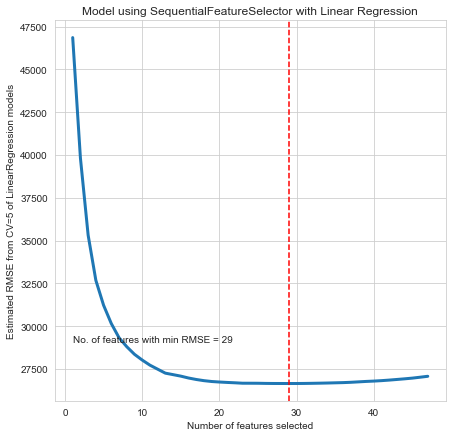

In [194]:
# Plotting obtained avg_score values against no. of features.

plt.figure(figsize=(7,7))

sns.lineplot(x=lr_sfs_df.index, y=lr_sfs_df['rmse'], linewidth=3)

# Finding the number of features which give minimum RMSE value.
min_rmse_features = lr_sfs_df[lr_sfs_df['rmse']==lr_sfs_df['rmse'].min()].index.values[0]

# Plotting a vertical line at the number of features with minimum RMSE value.
plt.axvline(min_rmse_features, ls='--', color='r')

plt.xlabel("Number of features selected")
plt.ylabel("Estimated RMSE from CV=5 of LinearRegression models")

plt.title("Model using SequentialFeatureSelector with Linear Regression", loc='center', fontsize=12)

plt.text(x=1, y=lr_cv_mean_rmse+2000, s=f"No. of features with min RMSE = {min_rmse_features}")

# Exporting plot image in PNG format.
plt.savefig('../plot_images/SFS_LinReg_feature_selection.png', bbox_inches='tight');

The above plot shows that **as the number of selected features increases, the RMSE of the model decreases**. The RMSE of the model is lowest at the optimal number of selected features shown above.

One thing to note here would be that **even though the RMSE is decreasing with the number of selected features, the decrease is happening at a decreasing rate**. So, a trade-off would have to be made at some point, because **as the number of selected features increases, so does the complexity of the model**. And a more complex model tends to overfit the training data, and may not generalise well with new unseen data (also known as **bias-variance tradeoff**).

In [195]:
# Printing list of the indices of selected features with minimum RMSE suggested by the SequentialFeatureSelector model.

sfs_cols = list(lr_sfs_df['feature_idx'][min_rmse_features])
sfs_cols

[0,
 1,
 3,
 6,
 7,
 8,
 12,
 13,
 14,
 17,
 18,
 20,
 21,
 22,
 24,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 33,
 34,
 35,
 38,
 41,
 45,
 46]

In [196]:
# Filtering X_train_scaled_df, X_test_scaled_df & act_X_test_scaled_df to create new dataframes with the selected features.

X_train_scaled_lr_sfs = X_train_scaled_df.iloc[:, sfs_cols]

X_test_scaled_lr_sfs = X_test_scaled_df.iloc[:, sfs_cols]

act_X_test_scaled_lr_sfs = act_X_test_scaled_df.iloc[:, sfs_cols]

In [197]:
# Checking the newly created X_train_scaled_lr_sfs dataframe.

print(X_train_scaled_lr_sfs.shape)
X_train_scaled_lr_sfs.head()

(1629, 29)


BsmtFin SF 1  Wood Deck SF  Lot Area  Total Bsmt SF  Garage Area  \
0      0.513643      0.815889 -0.549725       0.741479     0.067939   
1     -0.185709     -0.745996  9.267089      -0.720500     0.477045   
2      1.640377      1.206360  0.784945       1.637148     1.183683   
3     -0.992478      0.441687  0.150301      -0.511984     0.040045   
4     -0.094290      0.108160 -0.464375       0.371838     0.755981   

   Gr Liv Area  Year Remod/Add  Year Built  Full Bath  Bsmt Cond  ...  \
0    -0.265283        1.001688    1.110371   0.779705   0.119604  ...   
1     0.409832       -1.615813   -0.780736  -1.050468   0.119604  ...   
2     1.151831        1.096870    1.143548   0.779705   0.119604  ...   
3     0.671099        0.954097    1.077193   0.779705   0.119604  ...   
4    -0.591345        1.001688    1.110371   0.779705   0.119604  ...   

   Overall Qual  MS SubClass_30.0  MS SubClass_60.0  MS Zoning_RL  \
0      0.637686         -0.228748         -0.484795      0.528824   
1     -0.767034         -0.228748         -0.484795      0.528824   
2      2.744765         -0.228748         -0.484795      0.528824   
3      0.637686         -0.228748          2.062726      0.528824   
4      0.637686         -0.228748         -0.484795      0.528824   

   Neighborhood_OldTown  Neighborhood_NridgHt  Mas Vnr Type_Stone  \
0              -0.29449              3.952524            3.313298   
1              -0.29449             -0.253003           -0.301814   
2              -0.29449             -0.253003           -0.301814   
3              -0.29449             -0.253003           -0.301814   
4              -0.29449             -0.253003           -0.301814   

   Foundation_PConc  Garage Type_Attchd  Sale Type_New  
0          1.105610            0.817959      -0.294490  
1         -0.904478           -1.222555      -0.294490  
2          1.105610            0.817959       3.395699  
3          1.105610           -1.222555      -0.294490  
4          1.105610            0.817959      -0.294490  

[5 rows x 29 columns]

In [198]:
# Checking the newly created X_test_scaled_lr_sfs dataframe.

print(X_test_scaled_lr_sfs.shape)
X_test_scaled_lr_sfs.head()

(408, 29)


BsmtFin SF 1  Wood Deck SF  Lot Area  Total Bsmt SF  Garage Area  \
0      1.302128      1.507348 -1.041858       0.613526     0.351524   
1     -0.135429     -0.745996 -0.559905      -0.784476     1.165087   
2     -0.992478      0.555575 -0.345747      -0.386401     0.477045   
3     -0.754790     -0.745996 -0.755662      -0.620981    -1.019911   
4     -0.992478     -0.404334  0.090008      -1.220463    -2.182144   

   Gr Liv Area  Year Remod/Add  Year Built  Full Bath  Bsmt Cond  ...  \
0    -0.378151        0.811324    0.977661  -1.050468   0.119604  ...   
1    -0.576714       -1.615813   -1.046155  -1.050468   0.119604  ...   
2     0.984620       -1.615813   -1.875587  -1.050468   0.119604  ...   
3    -1.467114       -1.615813   -0.780736  -1.050468   0.119604  ...   
4    -0.307086       -1.615813   -1.875587   0.779705  -1.619993  ...   

   Overall Qual  MS SubClass_30.0  MS SubClass_60.0  MS Zoning_RL  \
0      2.042405         -0.228748         -0.484795      -1.89099   
1     -0.064674         -0.228748         -0.484795      -1.89099   
2     -1.469394         -0.228748         -0.484795      -1.89099   
3     -0.767034         -0.228748         -0.484795      -1.89099   
4     -2.171753         -0.228748         -0.484795      -1.89099   

   Neighborhood_OldTown  Neighborhood_NridgHt  Mas Vnr Type_Stone  \
0             -0.294490             -0.253003           -0.301814   
1             -0.294490             -0.253003           -0.301814   
2              3.395699             -0.253003           -0.301814   
3              3.395699             -0.253003           -0.301814   
4             -0.294490             -0.253003           -0.301814   

   Foundation_PConc  Garage Type_Attchd  Sale Type_New  
0          1.105610            0.817959       -0.29449  
1         -0.904478           -1.222555       -0.29449  
2         -0.904478           -1.222555       -0.29449  
3         -0.904478           -1.222555       -0.29449  
4          1.105610           -1.222555       -0.29449  

[5 rows x 29 columns]

In [199]:
# Checking the newly created act_X_test_scaled_lr_sfs dataframe.

print(act_X_test_scaled_lr_sfs.shape)
act_X_test_scaled_lr_sfs.head()

(879, 29)


BsmtFin SF 1  Wood Deck SF  Lot Area  Total Bsmt SF  Garage Area  \
0     -0.992478     -0.745996 -0.140594      -0.073627    -0.136614   
1     -0.992478      0.636923 -0.038800       2.170285     0.514236   
2      0.273669      0.067486  1.418022      -0.940863    -0.201699   
3     -0.992478     -0.745996 -0.262354      -0.196841     0.049343   
4      0.399370     -0.745996 -0.070513       0.812564     0.207407   

   Gr Liv Area  Year Remod/Add  Year Built  Full Bath  Bsmt Cond  ...  \
0     0.913555       -1.615813   -2.041474   0.779705   0.119604  ...   
1     0.995071       -0.330858    0.181406   0.779705   0.119604  ...   
2     0.010615        1.049279    1.143548   0.779705   1.859200  ...   
3    -1.092979        1.049279   -1.610169  -1.050468   0.119604  ...   
4    -0.202579       -0.997131   -0.283076  -1.050468   0.119604  ...   

   Overall Qual  MS SubClass_30.0  MS SubClass_60.0  MS Zoning_RL  \
0     -0.064674         -0.228748         -0.484795     -1.890990   
1     -0.767034         -0.228748         -0.484795      0.528824   
2      0.637686         -0.228748          2.062726      0.528824   
3     -0.767034          4.371626         -0.484795     -1.890990   
4     -0.064674         -0.228748         -0.484795      0.528824   

   Neighborhood_OldTown  Neighborhood_NridgHt  Mas Vnr Type_Stone  \
0              3.395699             -0.253003           -0.301814   
1             -0.294490             -0.253003           -0.301814   
2             -0.294490             -0.253003           -0.301814   
3              3.395699             -0.253003           -0.301814   
4             -0.294490             -0.253003           -0.301814   

   Foundation_PConc  Garage Type_Attchd  Sale Type_New  
0         -0.904478           -1.222555      -0.294490  
1         -0.904478            0.817959      -0.294490  
2          1.105610            0.817959       3.395699  
3         -0.904478           -1.222555      -0.294490  
4         -0.904478            0.817959      -0.294490  

[5 rows x 29 columns]

In [200]:
# Creating a new LinearRegression model with the selected features suggested by SequentialFeatureSelector above.

lr5 = LinearRegression()
lr5.fit(X_train_scaled_lr_sfs, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [201]:
lr5.coef_

array([10889.49053369,  2153.20831653,  7469.7333131 ,  9853.3248461 ,
        5761.87839916, 23508.3501568 ,  3498.48984074,  2152.49760136,
       -3732.98054673, -2962.56851224, -1258.26025243,  1685.76809638,
       -1155.30778042,  4600.913254  ,  1567.04288406,  3937.53243111,
         750.15320458,  5655.0647267 ,  7141.49452099, 17653.33592257,
        2007.79575137,  2071.69829298,  1044.04621809, -2253.33463904,
        4487.87040203,  1659.41196895,  1542.00312283, -2295.53740361,
        5794.93128751])

In [202]:
lr5.intercept_

180569.16574585636

In [203]:
# Estimated test r2 score from 5 cross validations.

cross_val_score(lr5, X_train_scaled_lr_sfs, y_train, cv=5, scoring='r2').mean()

0.8843869777014216

In [204]:
# Spread of train r2 scores from 5 cross validations.

cross_val_score(lr5, X_train_scaled_lr_sfs, y_train, cv=5, scoring='r2').std()

0.021361277662039317

In [205]:
# Estimated test MSE from 5 cross validations.

-cross_val_score(lr5, X_train_scaled_lr_sfs, y_train, cv=5, scoring='neg_mean_squared_error').mean()

710428723.3959882

In [206]:
# Spread of train MSE from 5 cross validations.

(-cross_val_score(lr5, X_train_scaled_lr_sfs, y_train, cv=5, scoring='neg_mean_squared_error')).std()

120516661.26565535

In [207]:
# Estimated test RMSE from 5 cross validations.

np.sqrt(-cross_val_score(lr5, X_train_scaled_lr_sfs, y_train, cv=5, scoring='neg_mean_squared_error').mean())

26653.868826044527

In [208]:
# Generating test predictions from the model

pred_5 = lr5.predict(X_test_scaled_lr_sfs)

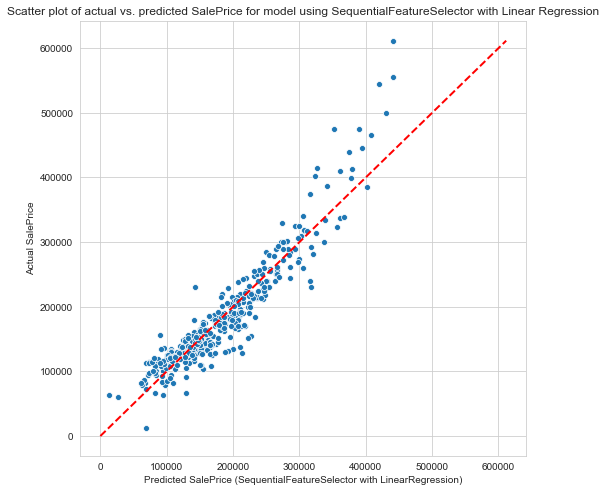

In [209]:
# Plotting the predictions against actual values.

plt.figure(figsize=(8,8))
    
sns.scatterplot(x=pred_5, y=y_test)

plt.plot([0, np.max(y_test)], [0, np.max(y_test)], linewidth=2, color='r', ls='--')

plt.xlabel("Predicted SalePrice (SequentialFeatureSelector with LinearRegression)")
plt.ylabel("Actual SalePrice")
    
plt.title("Scatter plot of actual vs. predicted SalePrice for model using SequentialFeatureSelector with Linear Regression", loc='center', fontsize=12)

# Exporting plot image in PNG format.
plt.savefig('../plot_images/scatterplot_SFS_lin_reg_predictions.png', bbox_inches='tight')

In [210]:
# Actual test r2 score.

r2_score(y_test, pred_5)

0.8778957322198233

In [211]:
# Actual test MSE.

mean_squared_error(y_test, pred_5)

825332641.4989282

In [212]:
# Actual test RMSE.

np.sqrt(mean_squared_error(y_test, pred_5))

28728.603194358897

In [213]:
data_5 = {'model_desc' : 'SFS, LinReg',
          'est_test_r2' : cross_val_score(lr5, X_train_scaled_lr_sfs, y_train, cv=5, scoring='r2').mean(),
          'est_test_r2_std' : cross_val_score(lr5, X_train_scaled_lr_sfs, y_train, cv=5, scoring='r2').std(),
          'est_test_MSE' : -cross_val_score(lr5, X_train_scaled_lr_sfs, y_train, cv=5, scoring='neg_mean_squared_error').mean(),
          'est_test_RMSE' : np.sqrt(-cross_val_score(lr5, X_train_scaled_lr_sfs, y_train, cv=5, scoring='neg_mean_squared_error').mean()),
          'act_test_r2' : r2_score(y_test, pred_5),
          'act_test_MSE' : mean_squared_error(y_test, pred_5),
          'act_test_RMSE' : np.sqrt(mean_squared_error(y_test, pred_5)),
          'remarks' : f'SFS showed RMSE min with selected {min_rmse_features} out of 47 features. LinReg model built on {min_rmse_features} selected features.'
         }

In [214]:
summary_df = summary_df.append(pd.DataFrame(data=data_5, index=[5]))
summary_df

model_desc  est_test_r2  est_test_r2_std  est_test_MSE  \
1             RFECV, LinReg     0.881631         0.024312  7.274906e+08   
2            RidgeCV, Ridge     0.881556         0.024087  7.279020e+08   
3            LassoCV, Lasso     0.882251         0.023885  7.236251e+08   
4  GridSearchCV, ElasticNet     0.882251         0.023885  7.236251e+08   
5               SFS, LinReg     0.884387         0.021361  7.104287e+08   

   est_test_RMSE  act_test_r2  act_test_MSE  act_test_RMSE  \
1   26972.034018     0.876732  8.332001e+08   28865.206028   
2   26979.659799     0.874498  8.482970e+08   29125.538302   
3   26900.280678     0.877884  8.254110e+08   28729.967574   
4   26900.280678     0.877884  8.254110e+08   28729.967574   
5   26653.868826     0.877896  8.253326e+08   28728.603194   

                                             remarks  
1  RFECV selected 43 out of 47 features. LinReg m...  
2  RidgeCV suggested optimal alpha = 33.039850698...  
3             LassoCV suggested optimal alpha = 307.  
4  GridSearchCV suggested best l1 ratio = 1.0. So...  
5  SFS showed RMSE min with selected 29 out of 47...

In [215]:
# Generating actual test predictions from the model

act_pred_5 = lr5.predict(act_X_test_scaled_lr_sfs)

In [216]:
# Exporting predictions generated to CSV file for sumssion to kaggle challenge.

submission_5 = pd.DataFrame(act_pred_5, columns=['SalePrice'])
submission_5 = ce_test[['Id']].sort_values(by='Id').astype(int)
submission_5['SalePrice'] = act_pred_5
submission_5.to_csv('../datasets/submission_5.csv', index=False)

## Conclusions and Recommendations

Beginning with the problem statement of predicting the housing sale prices for houses in Ames, IA, USA, this project started with the process of understanding the different variables in the given datasets. The data science process started with cleaning the datasets and one-hot encoding of all the nominal categorical variables, so that they can be utilized in the machine learning models later on.

The next stage of the process was EDA, which helped to provide an understanding of the variables in the dataset and the different correlations that existed between them. Before the EDA process, the dataset had >200 columns of variables. By looking at the different types of variables (continuous, discrete, ordinal & nominal) in detail, we were successfully able to **filter out a lot of the not-so-highly correlated variables (with respect to target variable *SalePrice*)**. We were also able to **filter out some of the outliers** that would have negatively affected the machine learning models by increasing their bias, and thus resulted in incorrect predictions of housing sale prices.

With a smaller and more manageable number of selected variables from the dataset, the next stage of feature selection, model building and evaluation was commenced. Models were built by employing different techniques of feature selection, and were evaluated using metrics such as R^2 score, Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

The following is a summary of the models and their evaluation metrics.

In [217]:
summary_df

model_desc  est_test_r2  est_test_r2_std  est_test_MSE  \
1             RFECV, LinReg     0.881631         0.024312  7.274906e+08   
2            RidgeCV, Ridge     0.881556         0.024087  7.279020e+08   
3            LassoCV, Lasso     0.882251         0.023885  7.236251e+08   
4  GridSearchCV, ElasticNet     0.882251         0.023885  7.236251e+08   
5               SFS, LinReg     0.884387         0.021361  7.104287e+08   

   est_test_RMSE  act_test_r2  act_test_MSE  act_test_RMSE  \
1   26972.034018     0.876732  8.332001e+08   28865.206028   
2   26979.659799     0.874498  8.482970e+08   29125.538302   
3   26900.280678     0.877884  8.254110e+08   28729.967574   
4   26900.280678     0.877884  8.254110e+08   28729.967574   
5   26653.868826     0.877896  8.253326e+08   28728.603194   

                                             remarks  
1  RFECV selected 43 out of 47 features. LinReg m...  
2  RidgeCV suggested optimal alpha = 33.039850698...  
3             LassoCV suggested optimal alpha = 307.  
4  GridSearchCV suggested best l1 ratio = 1.0. So...  
5  SFS showed RMSE min with selected 29 out of 47...

Judging from above, it can be said that **all of the models built predict the housing sale prices relatively well**.

The estimated test R^2 scores and the actual test R^2 scores are generally in the range of 0.85-0.90 for all the models. This means that these **models explain 85-90% of the variability in the data, relative to a model with no predictors (put simply, just the mean of all *SalePrice* values, ie. baseline model)**. Furthermore, the standard deviation of these R^2 scores are not very high (across the k-folds of cross-validation), which implies that the models perform relatively consistently across the different folds of cross-validation.

However, there may be a drawback to relying too heavily on the R^2 score values to judge the consistency of the models. By it's way of definition, **R^2 score does not decrease as more predictors are added into the model**. And since the above models are built with a relatively high number of predictors (~20-47), perhaps it would be better to not rely so heavily on the R^2 score. Instead, an **adjusted R^2 score** could be employed in such cases.

The estimated test RMSE and the actual test RMSE values are generally in the range of 25,000-30,000. This means that **on average (approximately), the predicted *SalePrice* values are off from the actual *SalePrice* values by 25-30 thousand dollars**.

It can also be seen that the values of the metrics calculated while training the model on k-folds of cross validation (estimated test metrics) actually improve when the model is used to predict values on the test dataset (actual test metrics). This implies that **the models designed above would mostly generalize well on new unseen data**.

So, to answer the problem statement, **the models designed in this project can be used to predict the housing sale prices for houses in Ames, IA, USA relatively well. The metrics also indicate that the above models generally predict similarly with no major differences in performance**.

The predictions of housing sale prices from these models may be very relevant in the real world. For instance, these predictions may be used by home owners, buyers, sellers and realtors to gauge how much a house may be worth given it's characteristics (features). The predictions may also be used by the local government for tax assessment purposes or by financial institutions to determine the loan and mortgage rates. Although the predictions modelled in this project may be localized to the city of Ames, they may be applied to other cities (with caution) to understand the differences, before refining the models for such cities.